# <center> **Audio Classification using Deep Learning**


# **Introduction**


## Importing the required modules


In [3]:
!pip install librosa

In [4]:
!pip install tensorflow

In [5]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")


In [6]:
log_cols = ["model", "accuracy", "train_time", "pred_time"]
log = pd.DataFrame(columns=log_cols)


## Reading the data


In [7]:
# reading the files
audio_dataset_path = "D:/audio_data/"

# loading the csv
meta_data = pd.read_csv(r"D:\audio_data\UrbanSound8K.csv")
meta_data["class"] = meta_data["class"].replace(
    to_replace="air_conditioner", value="Air Conditioner"
)
meta_data["class"] = meta_data["class"].replace(to_replace="car_horn", value="Car Horn")
meta_data["class"] = meta_data["class"].replace(
    to_replace="children_playing", value="Children Playing"
)
meta_data["class"] = meta_data["class"].replace(to_replace="dog_bark", value="Dog Bark")
meta_data["class"] = meta_data["class"].replace(to_replace="drilling", value="Drilling")
meta_data["class"] = meta_data["class"].replace(
    to_replace="engine_idling", value="Engine Idling"
)
meta_data["class"] = meta_data["class"].replace(to_replace="gun_shot", value="Gun Shot")
meta_data["class"] = meta_data["class"].replace(
    to_replace="jackhammer", value="Jackhammer"
)
meta_data["class"] = meta_data["class"].replace(to_replace="siren", value="Siren")
meta_data["class"] = meta_data["class"].replace(
    to_replace="street_music", value="Street Music"
)
meta_data.head()


slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          Dog Bark  
1  Children Playing  
2  Children Playing  
3  Children Playing  
4  Children Playing

In [8]:
meta_data.groupby("classID")["class"].unique()


classID
0     [Air Conditioner]
1            [Car Horn]
2    [Children Playing]
3            [Dog Bark]
4            [Drilling]
5       [Engine Idling]
6            [Gun Shot]
7          [Jackhammer]
8               [Siren]
9        [Street Music]
Name: class, dtype: object

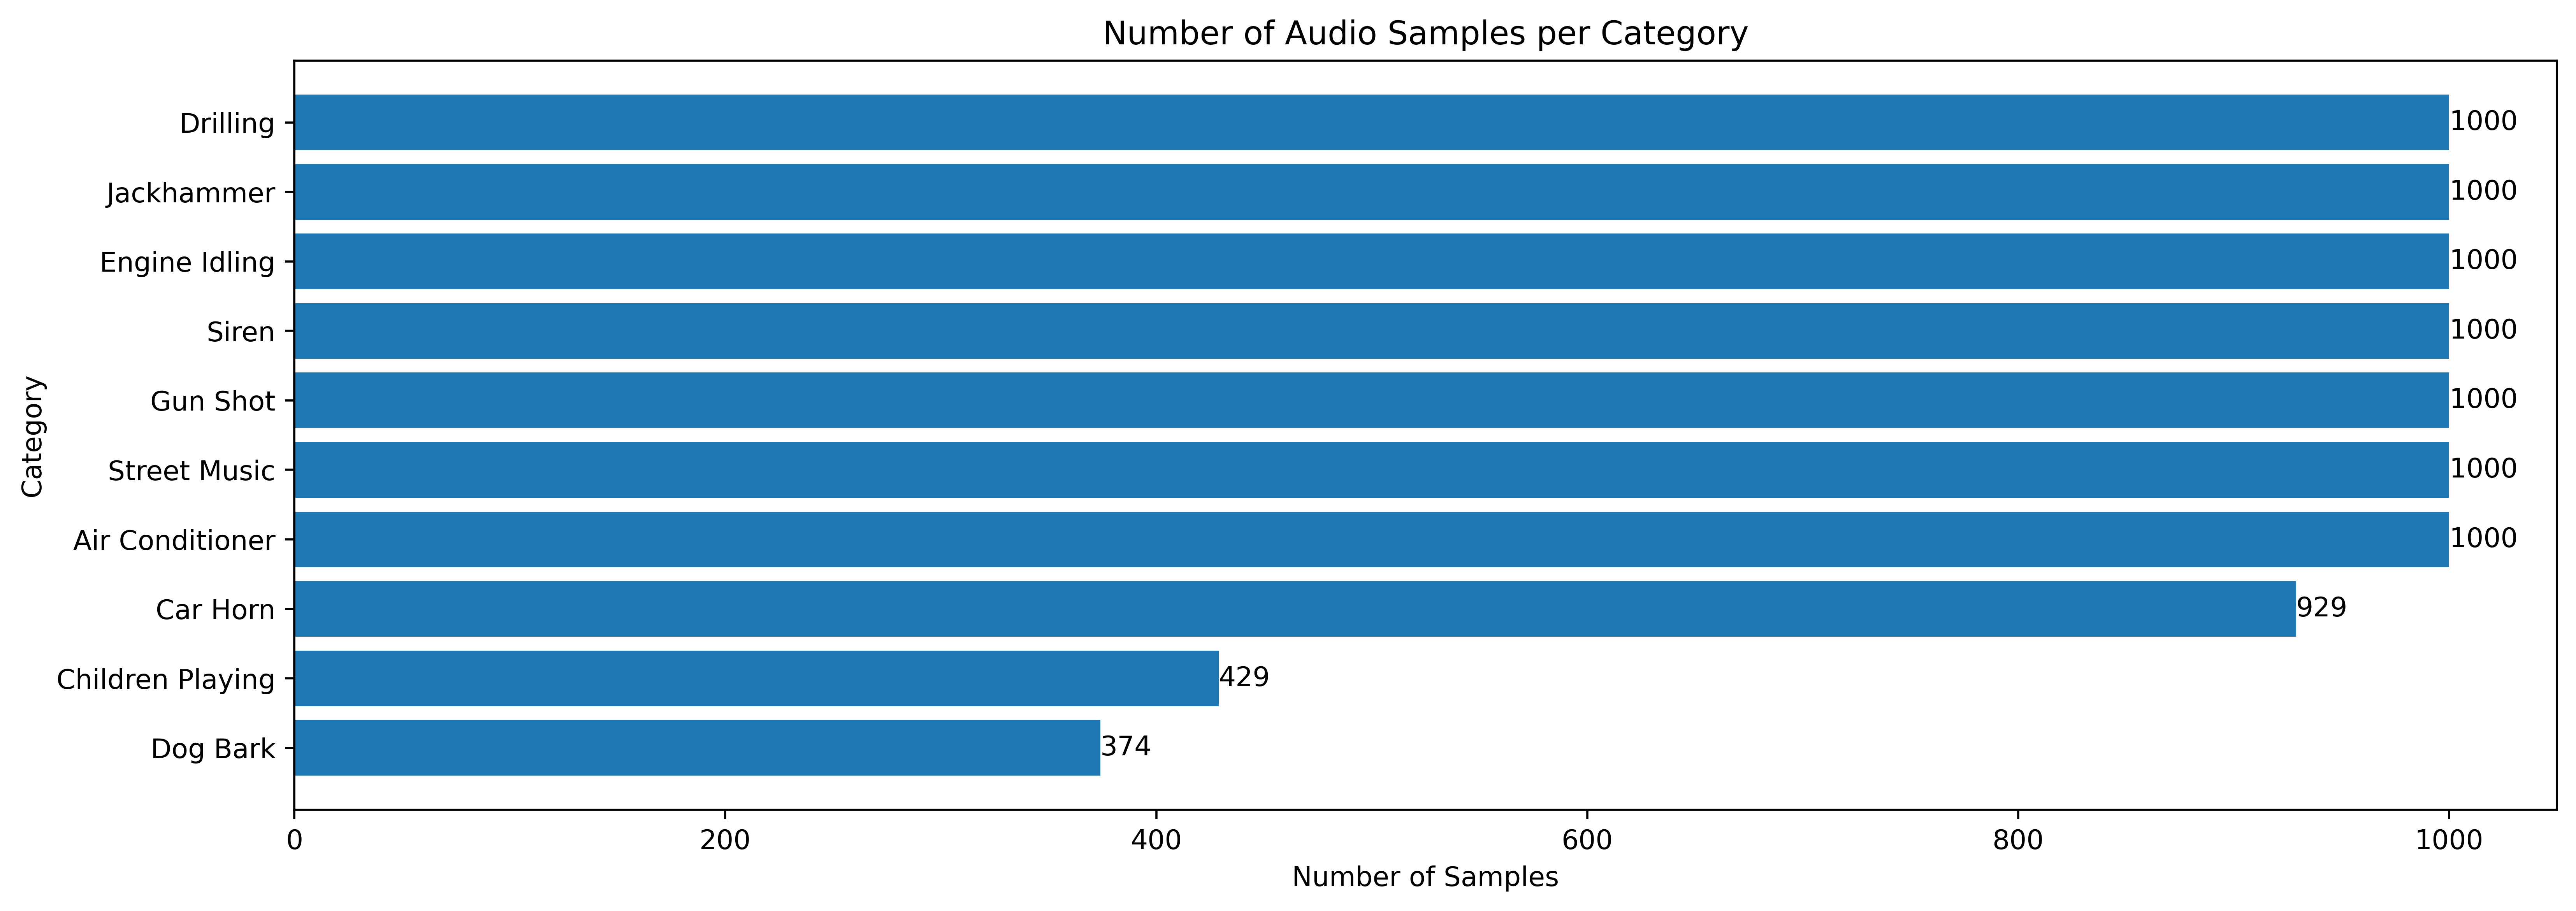

In [9]:
x = meta_data["class"].unique()
y = meta_data["class"].value_counts(ascending=True)
ind = np.arange(len(y))
# plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)
ax.bar_label(ax.containers[0])
plt.gcf().set_dpi(500)
plt.title("Number of Audio Samples per Category")
plt.xlabel("Number of Samples")
plt.ylabel("Category")
plt.show()


# **MFCC Visualization**


In [10]:
plt.rcParams["figure.figsize"] = (5, 2.5)
plt.rcParams["figure.dpi"] = 200


<function matplotlib.pyplot.show(close=None, block=None)>

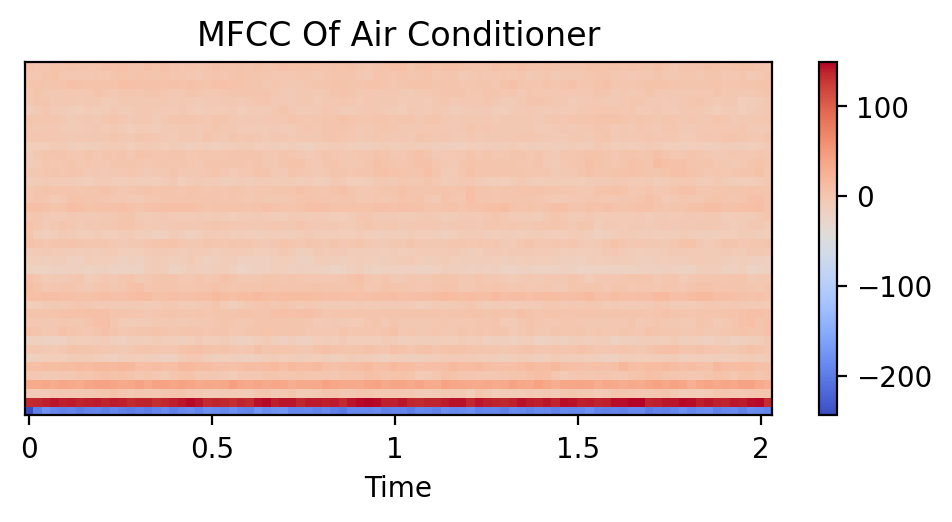

In [11]:
audio_path = audio_dataset_path + "fold1/127873-0-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Air Conditioner")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

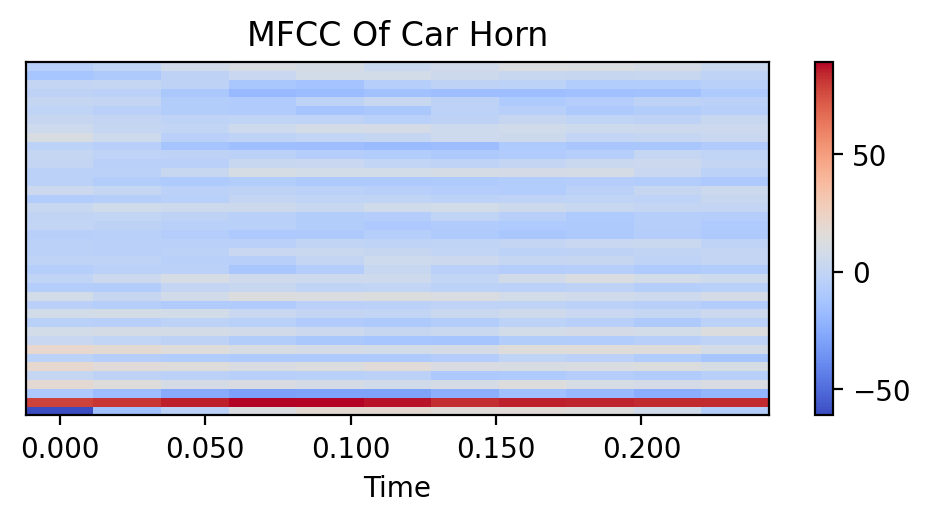

In [12]:
audio_path = audio_dataset_path + "fold1/156194-1-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Car Horn")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

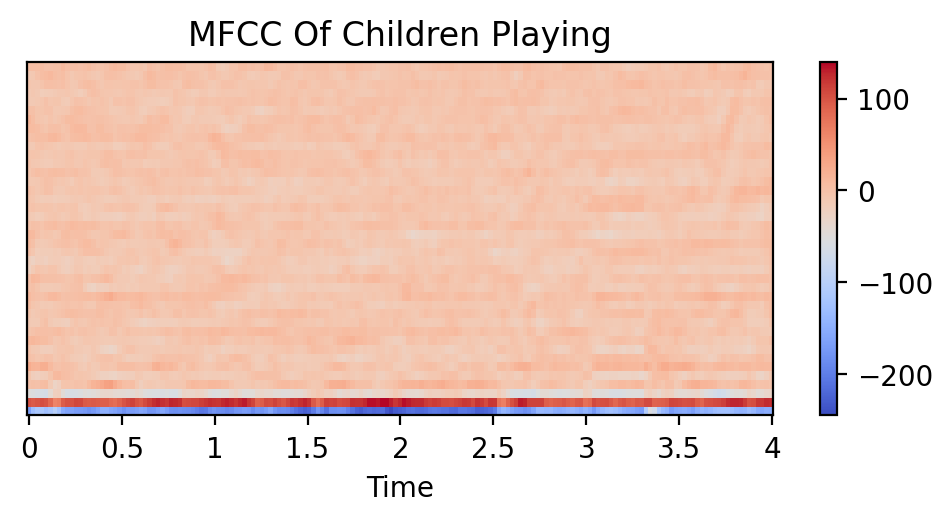

In [13]:
audio_path = audio_dataset_path + "fold1/105415-2-0-1.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Children Playing")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

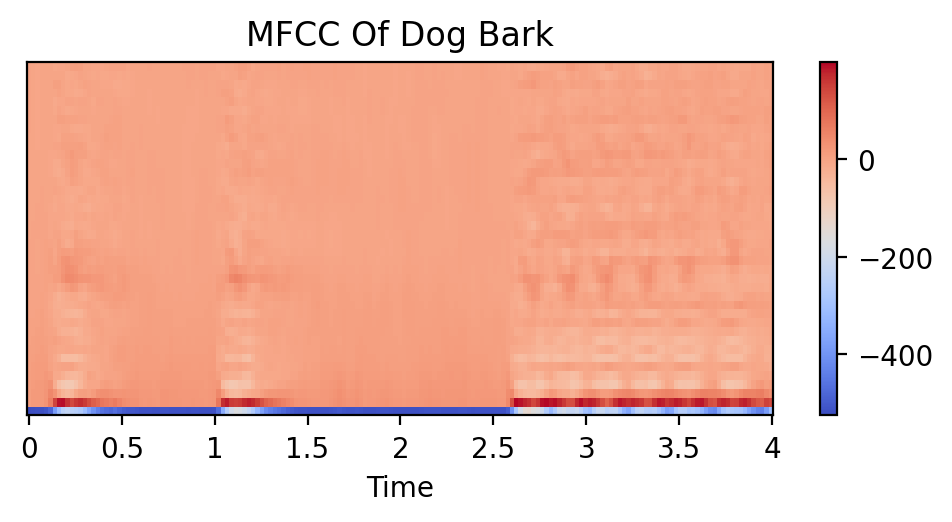

In [14]:
audio_path = audio_dataset_path + "fold1/101415-3-0-2.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Dog Bark")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

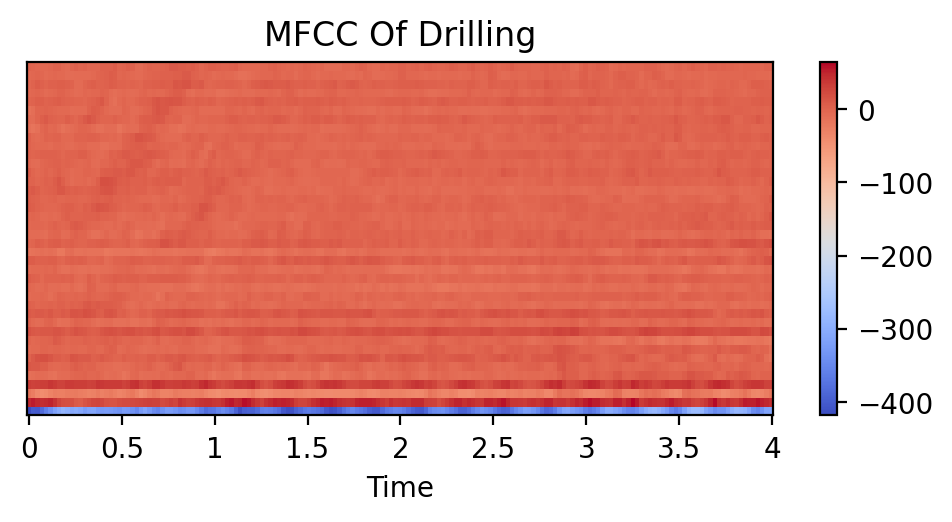

In [15]:
audio_path = audio_dataset_path + "/fold1/14113-4-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Drilling")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

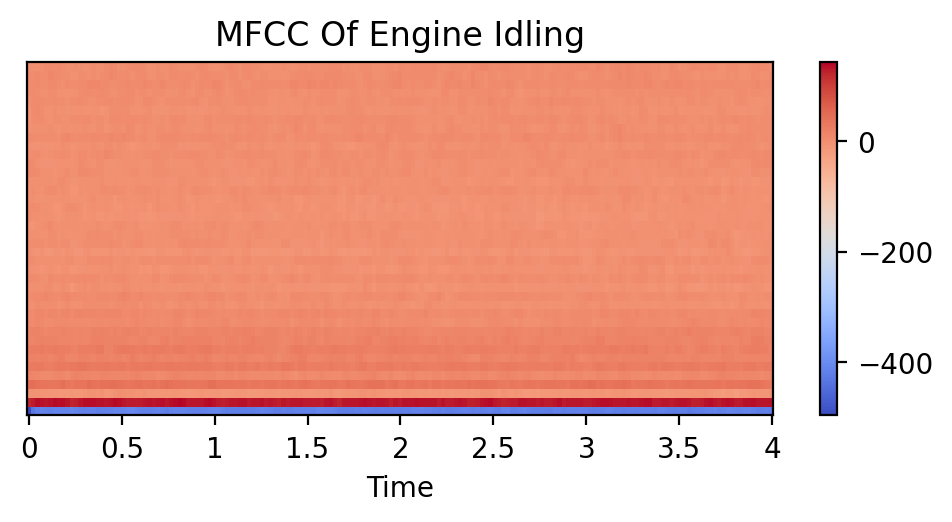

In [16]:
audio_path = audio_dataset_path + "fold1/103258-5-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Engine Idling")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

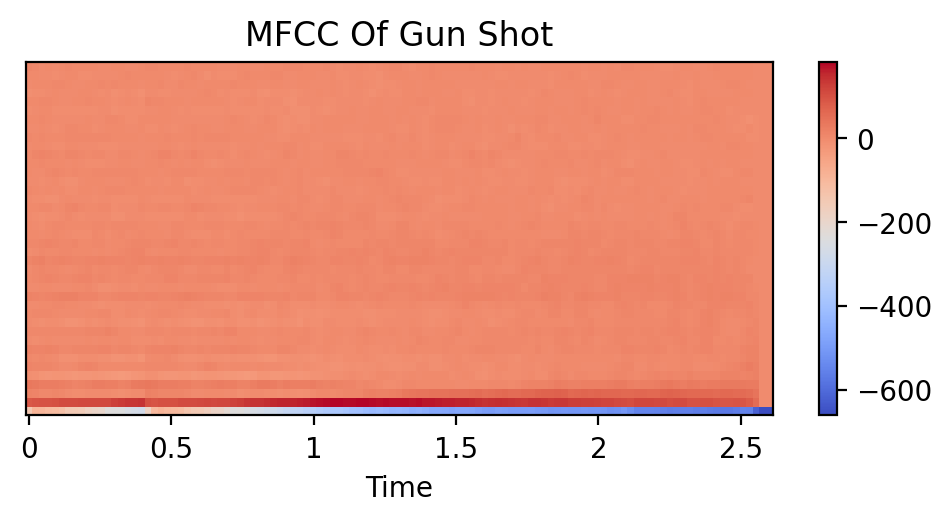

In [17]:
audio_path = audio_dataset_path + "fold1/102305-6-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Gun Shot")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

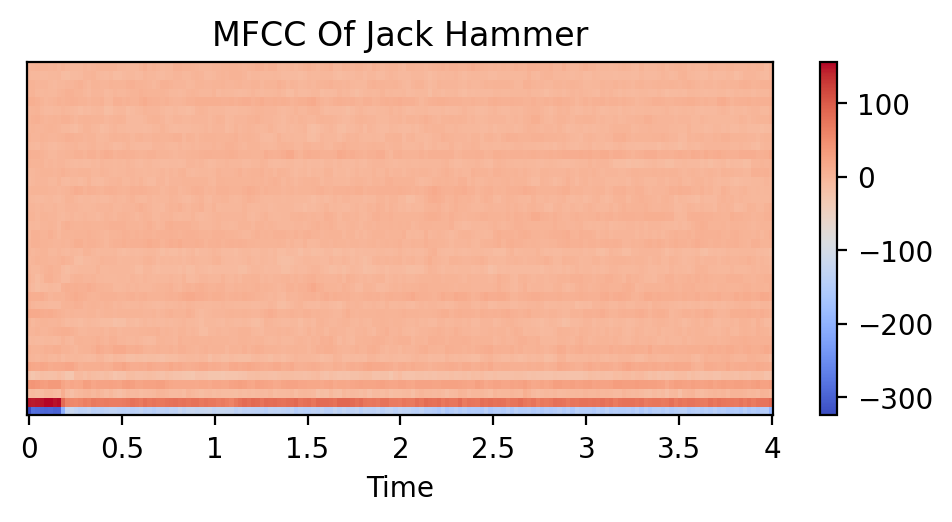

In [18]:
audio_path = audio_dataset_path + "fold1/103074-7-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Jack Hammer")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

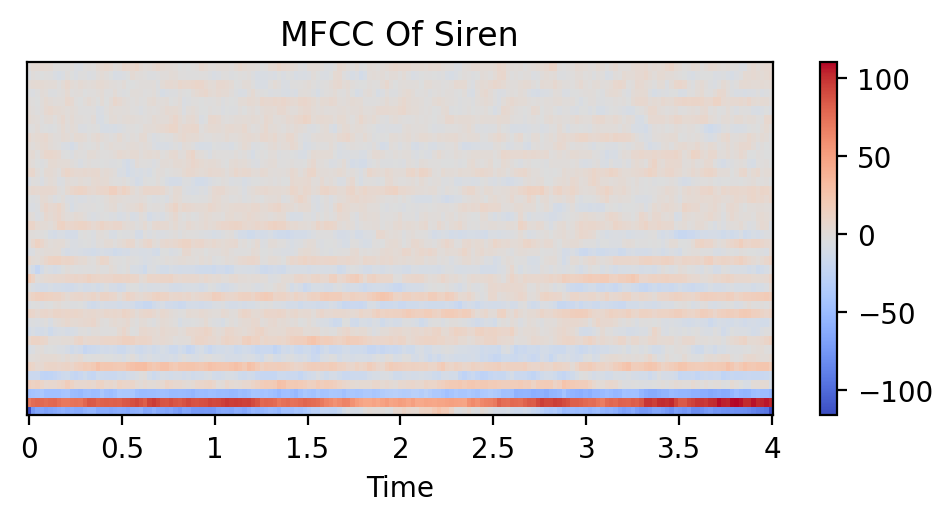

In [19]:
audio_path = audio_dataset_path + "fold1/106905-8-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Siren")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

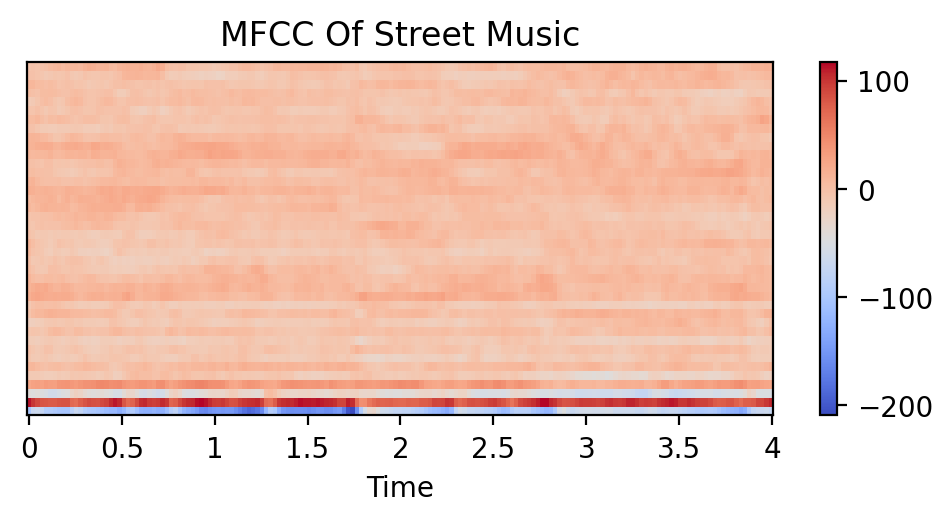

In [20]:
audio_path = audio_dataset_path + "fold1/108041-9-0-11.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Street Music")
plt.show


# **Feature Extraction and Database Building**

## Method

1. I have used Librosa to preprocess audio file.
2. To do so, I will go through each fold and extract the data from each file using librosa's mfcc function.
3. The extracted data is appended in a list and stored in a dataframe.

In [36]:
!pip install resampy

   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
    --------------------------------------- 0.0/3.1 MB 487.6 kB/s eta 0:00:07
   -- ------------------------------------- 0.2/3.1 MB 1.5 MB/s eta 0:00:02
   --------- ------------------------------ 0.7/3.1 MB 4.3 MB/s eta 0:00:01
   ------------------------- -------------- 2.0/3.1 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------  3.1/3.1 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 3.1/3.1 MB 10.9 MB/s eta 0:00:00


In [42]:
pip install --upgrade --force-reinstall resampy

  Using cached resampy-0.4.3-py3-none-any.whl.metadata (3.0 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached numba-0.59.1-cp311-cp311-win_amd64.whl.metadata (2.8 kB)
  Using cached llvmlite-0.42.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
Using cached resampy-0.4.3-py3-none-any.whl (3.1 MB)
Using cached numba-0.59.1-cp311-cp311-win_amd64.whl (2.6 MB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
Using cached llvmlite-0.42.0-cp311-cp311-win_amd64.whl (28.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.42.0
    Uninstalling llvmlite-0.42.0:
      Successfully uninstalled llvmlite-0.42.0
  Attempting uninstall: numba
    Found existing installation: numba 0.59.0
    Uninstalling numba-0.59.0:
      Successfully uninstalled numba-0.59.0
  Attempting

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


### The function bellow will extract mfcc feature

In [21]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [22]:
from tqdm import tqdm

In [25]:
# list containing all the features
extracted = []

# for each row in the csv
for index_num, row in tqdm(meta_data.iterrows()):
    # print(index_num)
    # get the file
    file_name = os.path.join(
        os.path.abspath(audio_dataset_path),
        "fold" + str(row["fold"]) + "/",
        str(row["slice_file_name"]),
    )
    # get file label
    final_class_labels = row["class"]
    # load the audio file
    audio, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # extract the features
    feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)
    # feature scaling
    scaled_feature = np.mean(feature.T, axis=0)
    # store it in a list
    extracted.append([scaled_feature, final_class_labels])


8732it [10:59, 13.25it/s]


# **Data Preprocessing**


### Using a dataframe and pickle to save the extracted features array

In [26]:
# create a new dataframe
extracted_df = pd.DataFrame(extracted, columns=["feature", "class"])
# Storing the dataframe to pickle for further processing
extracted_df.to_pickle("extracted_df.pkl")
extracted_df.head()


feature             class
0  [-217.35526, 70.22339, -130.38527, -53.282898,...          Dog Bark
1  [-424.09818, 109.34077, -52.919525, 60.86475, ...  Children Playing
2  [-458.79114, 121.38419, -46.520657, 52.00812, ...  Children Playing
3  [-413.89984, 101.66371, -35.42945, 53.036354, ...  Children Playing
4  [-446.60352, 113.68541, -52.402218, 60.302044,...  Children Playing

## Distribute the data to X and Y


In [27]:
# create a new dataframe
final = pd.DataFrame(extracted, columns=["feature", "class"])
X = np.array(final["feature"].tolist())
y = np.array(final["class"].tolist())


## Using LabelEncoder() to encode the string labels to an integer


In [28]:
# label encoding to get encoding
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))


## Split the data into train and test sets


In [29]:
# split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])


Number of training samples =  6985
Number of testing samples =  1747


# **Model 1 - ANN**


## Building the model


In [81]:
# Construct model

num_labels = Y.shape[1]
ANN_Model = Sequential()
ANN_Model.add(Dense(1000, activation="relu", input_shape=(128,)))
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(Dense(500, activation="relu"))
ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(Dense(num_labels, activation="softmax"))
ANN_Model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1000)                │         129,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 750)                 │         750,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 500)                 │         375,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │          25,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,411,160 (5.38 MB)

 Trainable params: 1,411,160 (5.38 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the model


In [82]:
ANN_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)


## Fitting the model


In [83]:
num_epochs = 100
num_batch_size = 32

t0 = time.time()

ANN_Results = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

ANN_Model.save("Model1.h5")
print("ANN Model Saved")
train_hist_m1 = pd.DataFrame(ANN_Results.history)
train_m1 = round(time.time() - t0, 3)


Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.3069 - loss: 2.3700 - val_accuracy: 0.5976 - val_loss: 1.1724
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6558 - loss: 1.0315 - val_accuracy: 0.7344 - val_loss: 0.8369
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7671 - loss: 0.7077 - val_accuracy: 0.7905 - val_loss: 0.6584
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8203 - loss: 0.5410 - val_accuracy: 0.8220 - val_loss: 0.5698
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8540 - loss: 0.4284 - val_accuracy: 0.8449 - val_loss: 0.5299
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8805 - loss: 0.3600 - val_accuracy: 0.8689 - val_loss: 0.4501
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8987 - loss: 0.3048 - val_accuracy: 0.8981 - val_loss: 0.3643
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9229 - loss: 0.2259 - 

ANN Model Saved


## Results


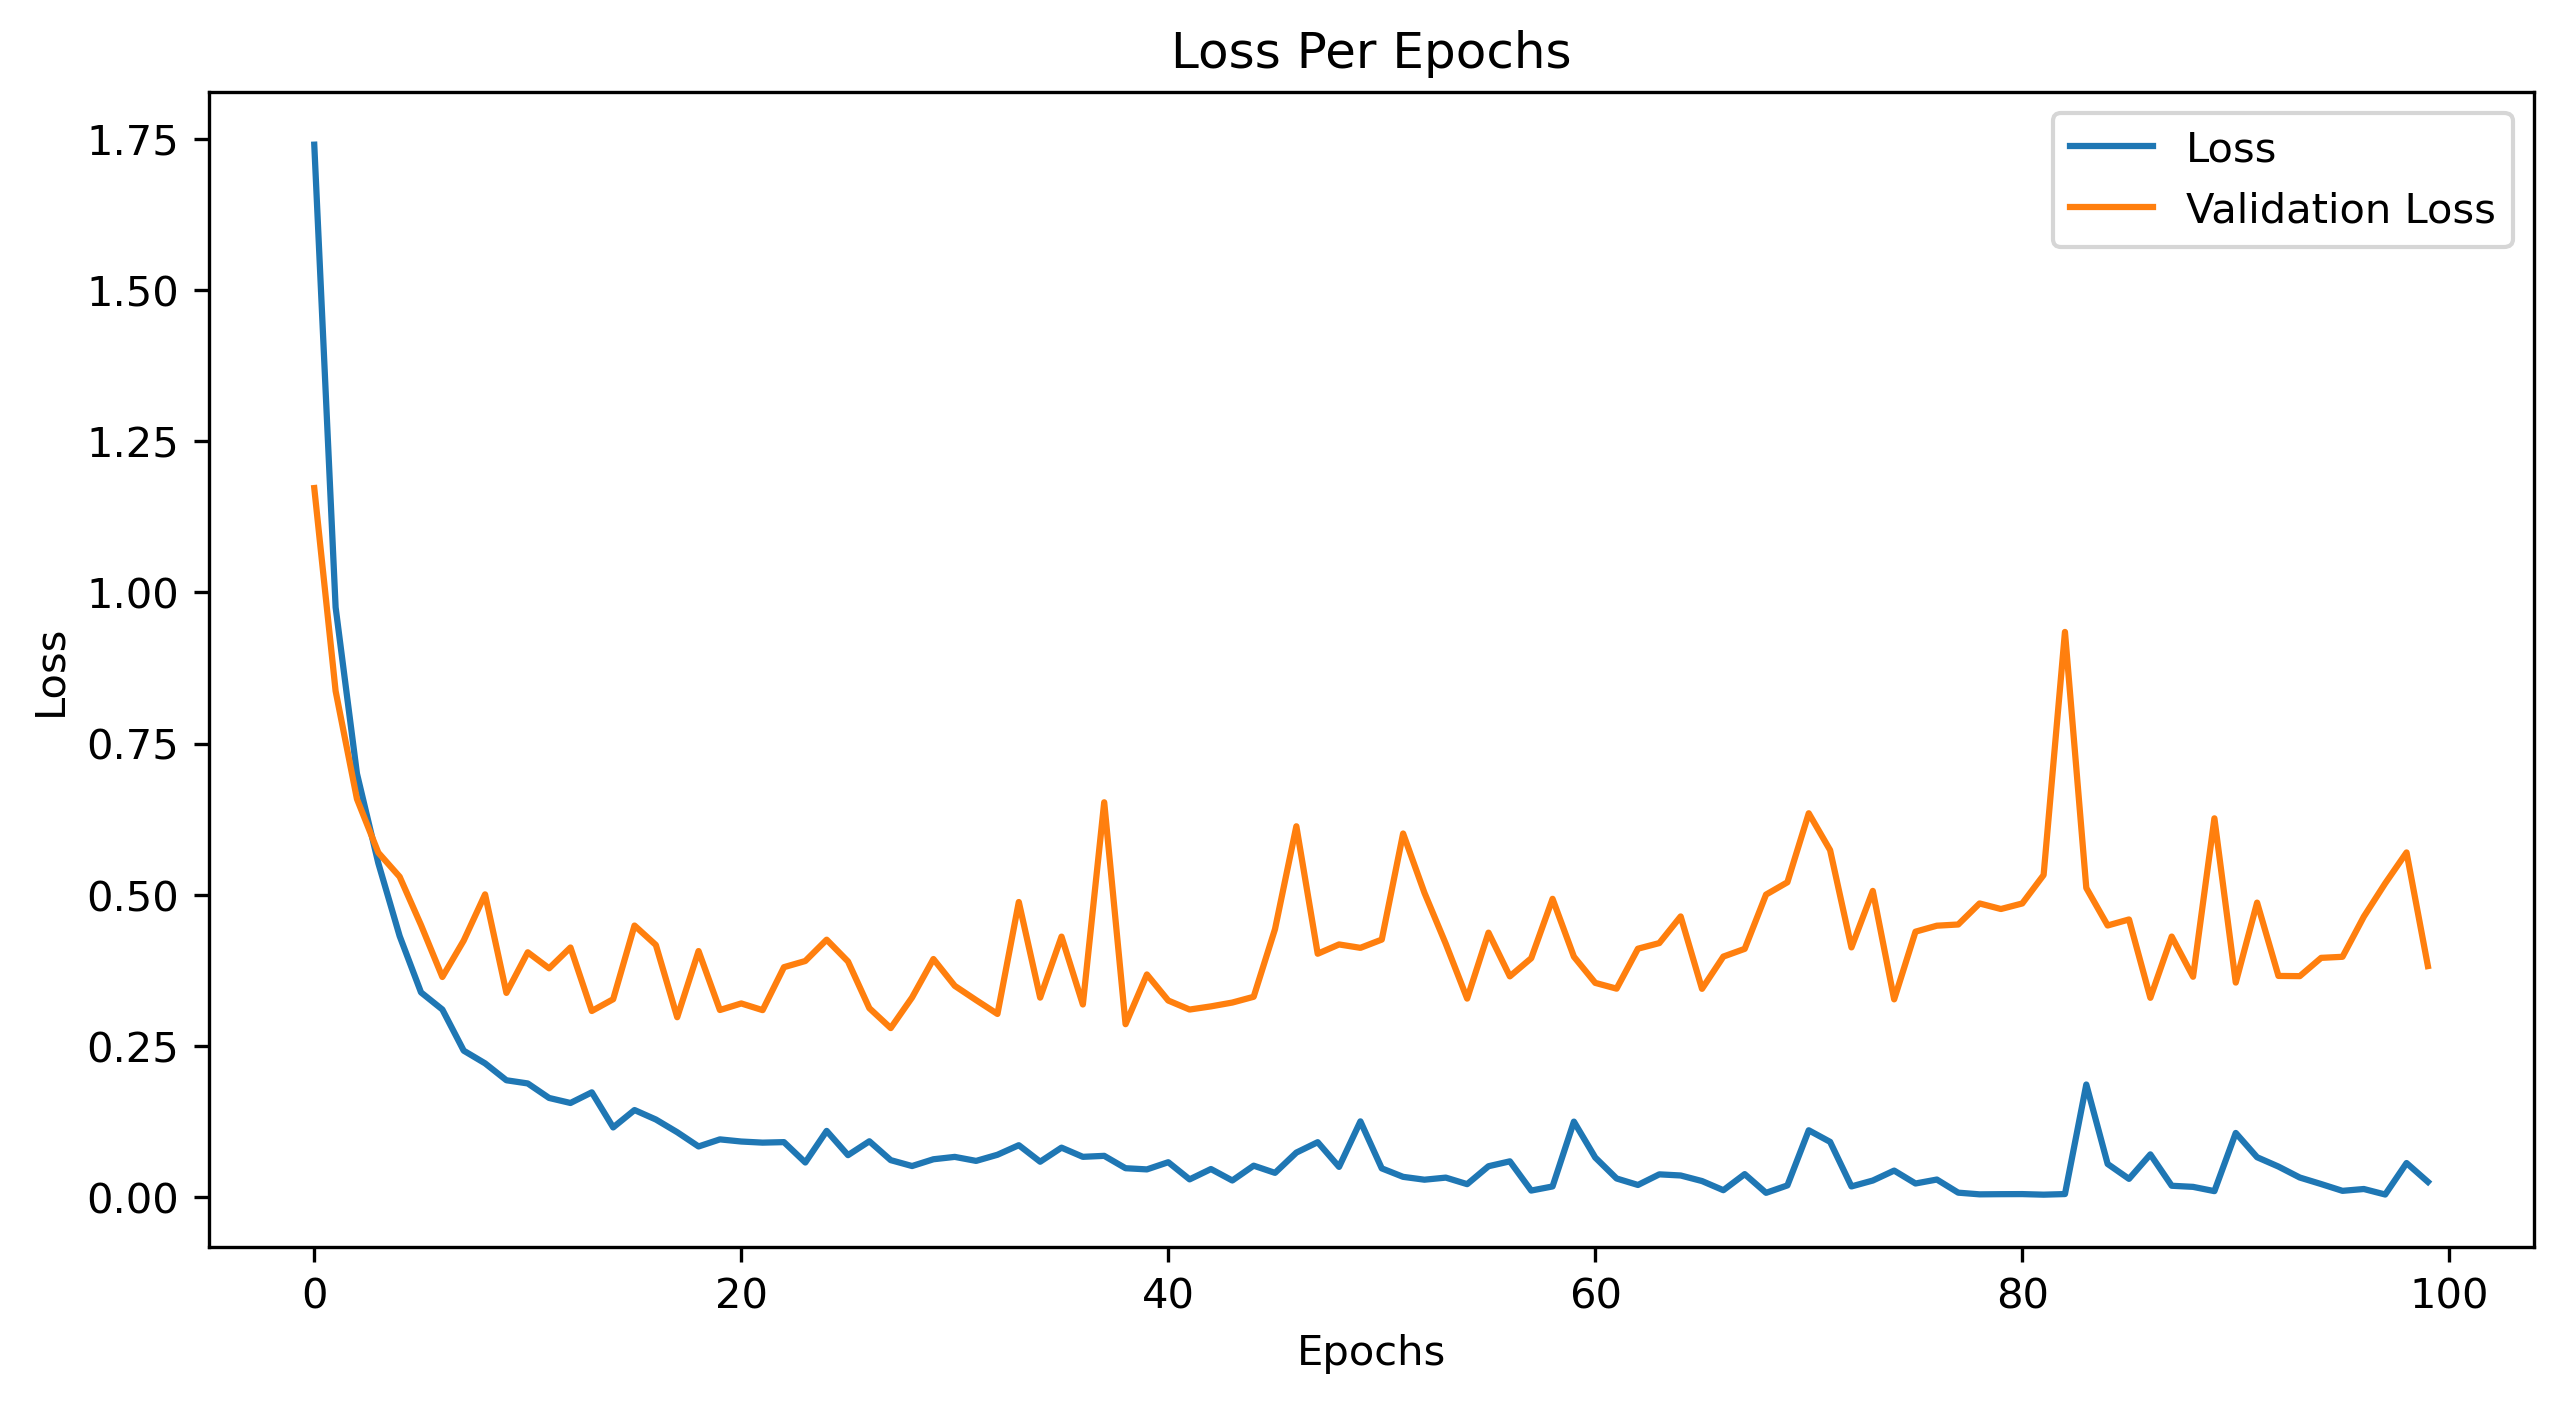

In [84]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m1[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


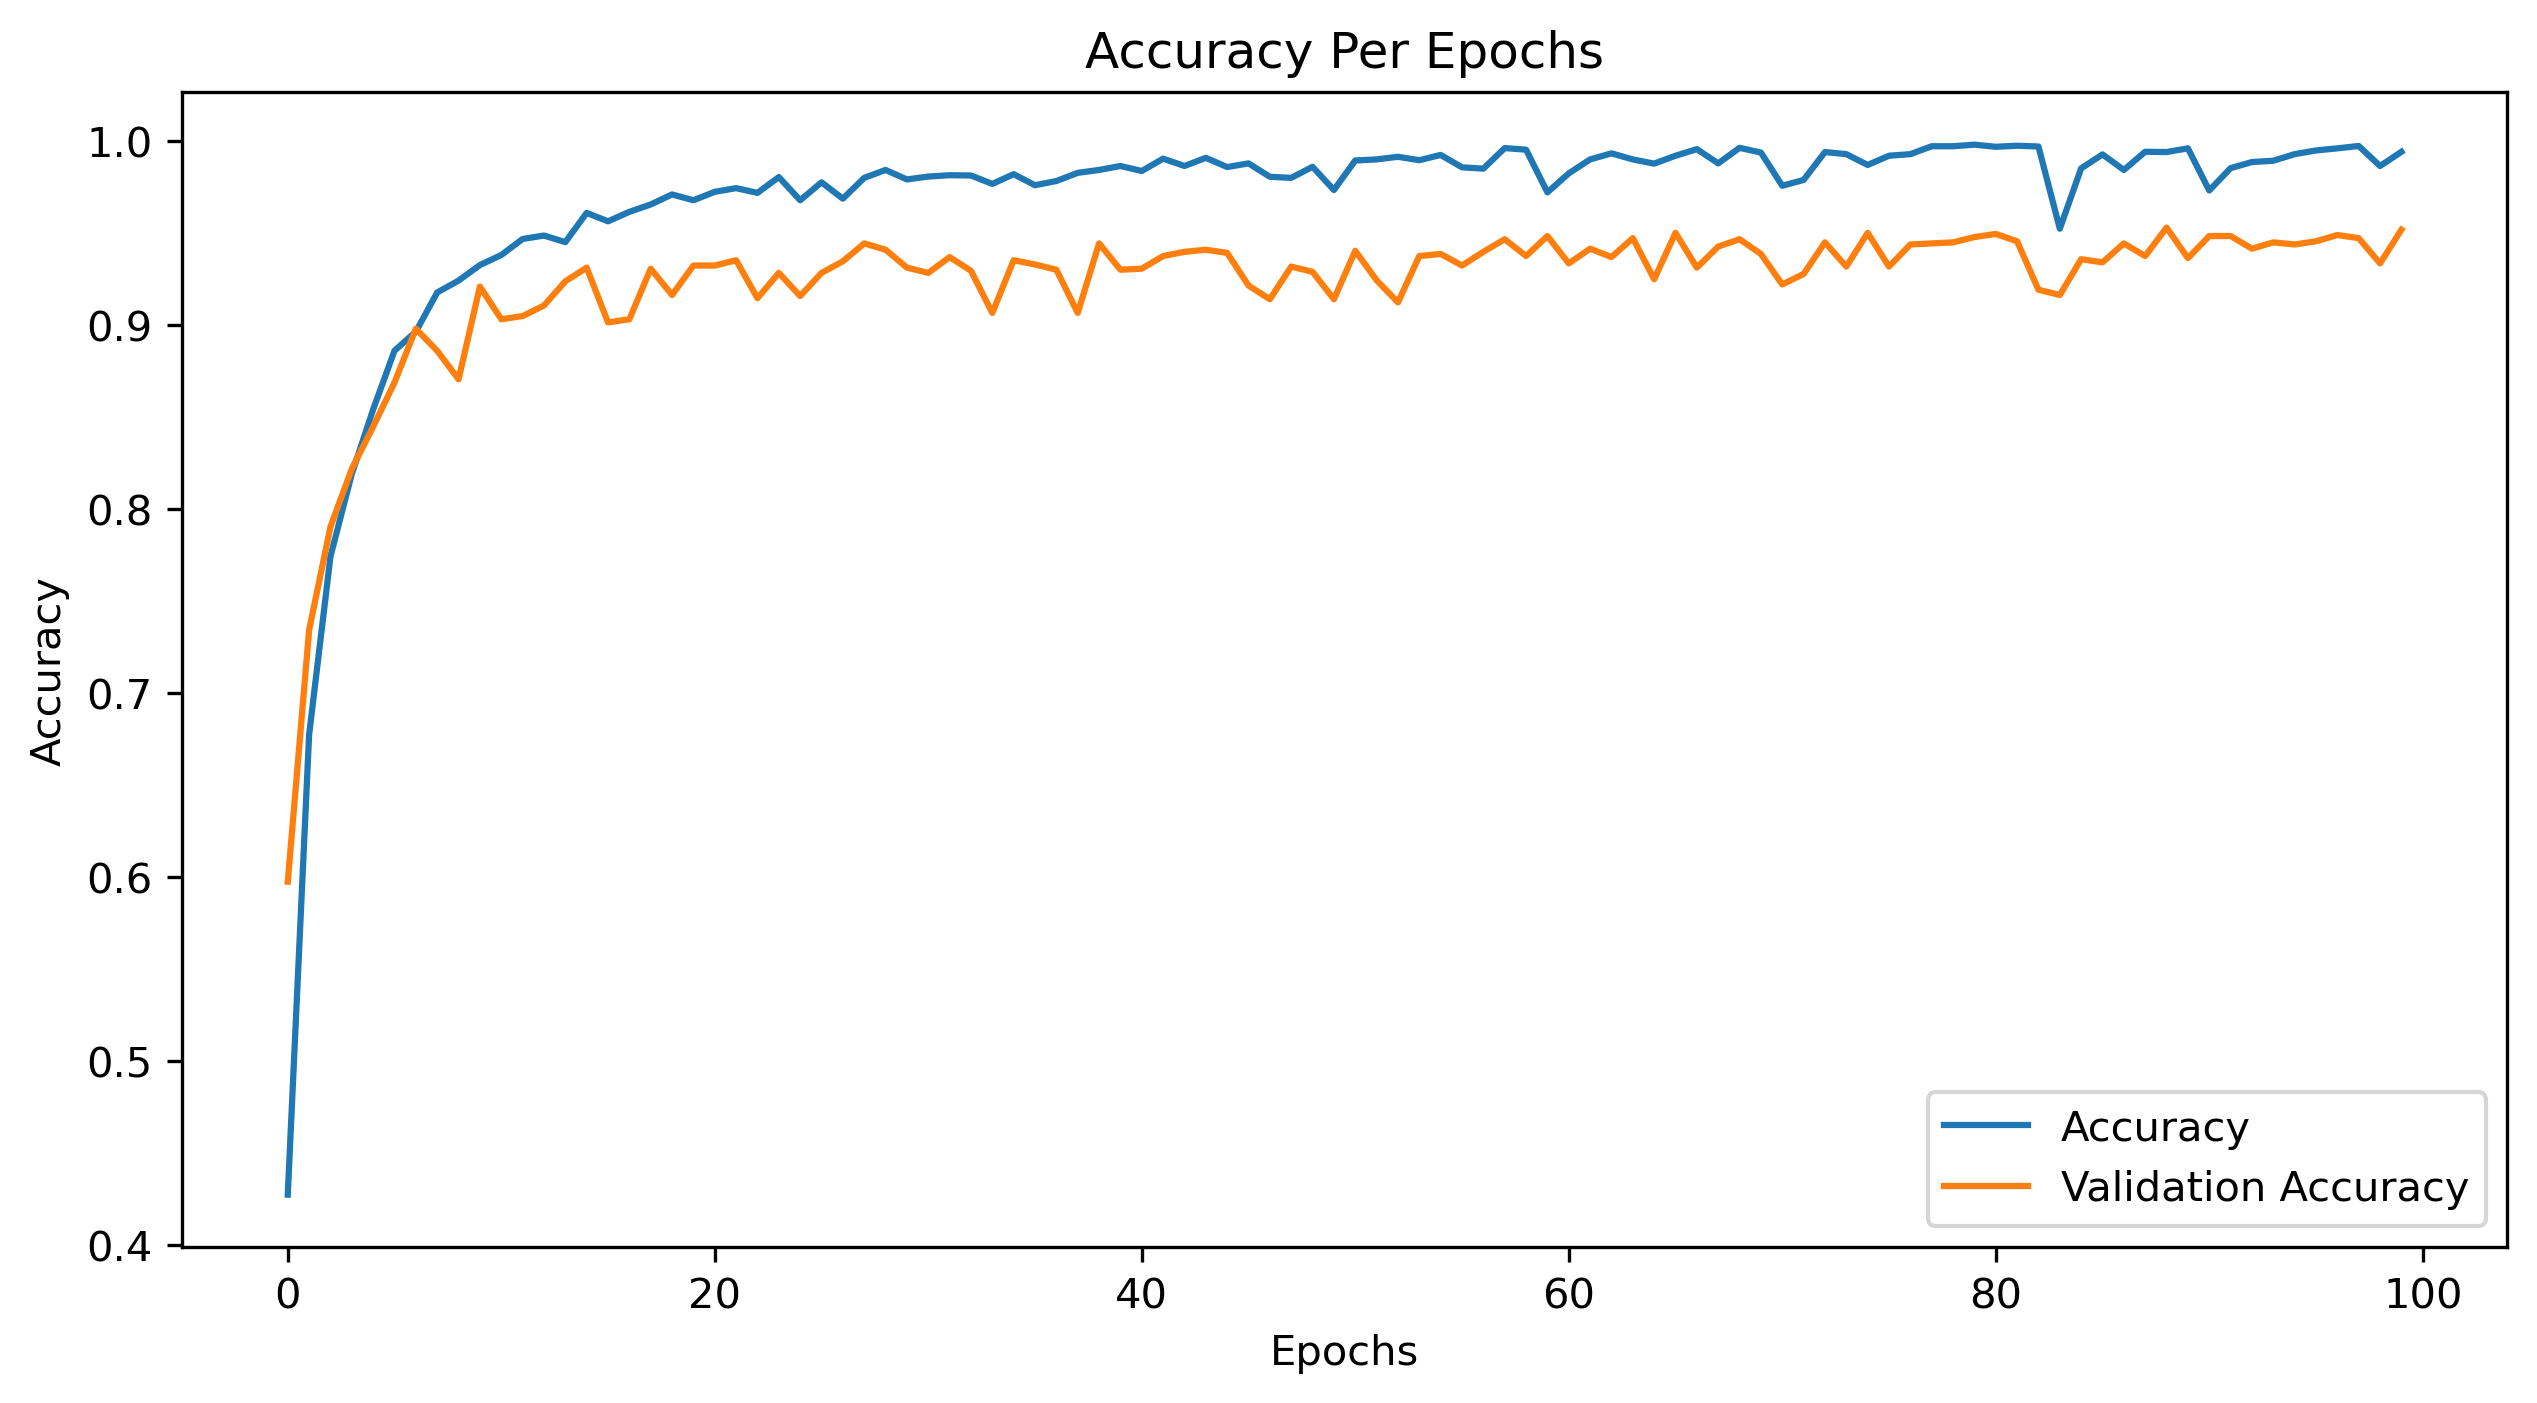

In [85]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m1[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


In [86]:
acc_m1 = ANN_Model.evaluate(X_test, y_test, verbose=0)
t0 = time.time()
y_pred_m1 = ANN_Model.predict(X_test, verbose=0)
pred_m1 = round(time.time() - t0, 3)
# Initialize log as an empty DataFrame
log = pd.DataFrame(columns=log_cols)

# Append data to log inside the loop
log_entry = pd.DataFrame(
    [["ANN", acc_m1[1] * 100, train_m1, pred_m1]], columns=log_cols
)
log = pd.concat([log, log_entry], ignore_index=True)



## ANN Prediction Function


In [87]:
# function to predict the feature
def ANN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(ANN_Model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("ANN has predicted the class as  --> ", predicted_class[0])


## Testing the Model on Sample audio


In [88]:
# File name
file_name = audio_dataset_path + "fold10/7913-3-1-0.wav"
# get the output
ANN_Prediction(file_name)
# play the file
ipd.Audio(file_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
ANN has predicted the class as  -->  Dog Bark


# **Model 2 - CNN1D**


## Preprocessing


In [89]:
xTrainval, xTest, yTrainval, yTest = train_test_split(
    X, Y, test_size=0.1, stratify=y, random_state=387
)
xTrain, xvalid, yTrain, yvalid = train_test_split(
    xTrainval, yTrainval, test_size=0.2, stratify=yTrainval, random_state=387
)
print("\nNumber of samples for Train set :", xTrain.shape[0])
print("Number of samples for Validation set :", xvalid.shape[0])
print("Number of samples for Test set :", xTest.shape[0])

xTrain = np.expand_dims(xTrain, axis=2)
xvalid = np.expand_dims(xvalid, axis=2)

print("Shape of X Train", xTrain.shape)
print("Shape of X Test", xTest.shape)



Number of samples for Train set : 6286
Number of samples for Validation set : 1572
Number of samples for Test set : 874
Shape of X Train (6286, 128, 1)
Shape of X Test (874, 128)


## Building the CNN1D Model


In [90]:
CNN1D_Model = Sequential()
CNN1D_Model.add(
    Conv1D(
        256,
        5,
        strides=1,
        padding="same",
        activation="relu",
        input_shape=(xTrain.shape[1], 1),
    )
)
CNN1D_Model.add(BatchNormalization())
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(256, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(128, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(64, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Flatten())
CNN1D_Model.add(Dense(units=1024, activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(Dense(units=10, activation="softmax"))
CNN1D_Model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 128, 256)            │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 64, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 64, 256)             │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 32, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 32, 128)             │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 16, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 16, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 8, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,071,050 (4.09 MB)

 Trainable params: 1,070,538 (4.08 MB)

 Non-trainable params: 512 (2.00 KB)

## Compiling the Model


In [91]:
CNN1D_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)


## Fitting the Model


In [92]:
t0 = time.time()

CNN1D_Results = CNN1D_Model.fit(
    xTrain, yTrain, batch_size=64, epochs=100, validation_data=(xvalid, yvalid)
)

CNN1D_Model.save("Model2.h5")
print("CNN1D Model Saved")
train_hist_m2 = pd.DataFrame(CNN1D_Results.history)
train_m2 = round(time.time() - t0, 3)


Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.2742 - loss: 2.3364 - val_accuracy: 0.3441 - val_loss: 1.7962
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.5439 - loss: 1.2911 - val_accuracy: 0.6412 - val_loss: 1.2721
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.6261 - loss: 1.0509 - val_accuracy: 0.7360 - val_loss: 1.0384
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.6940 - loss: 0.9028 - val_accuracy: 0.7354 - val_loss: 0.8850
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.7269 - loss: 0.7999 - val_accuracy: 0.7837 - val_loss: 0.8154
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.7436 - loss: 0.7370 - val_accuracy: 0.8047 - val_loss: 0.7554
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.7750 - loss: 0.6598 - val_accuracy: 0.8085 - val_loss: 0.6747
Epoch 8/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.8063 - loss: 0.5694 - val_accuracy: 0

CNN1D Model Saved


## Results


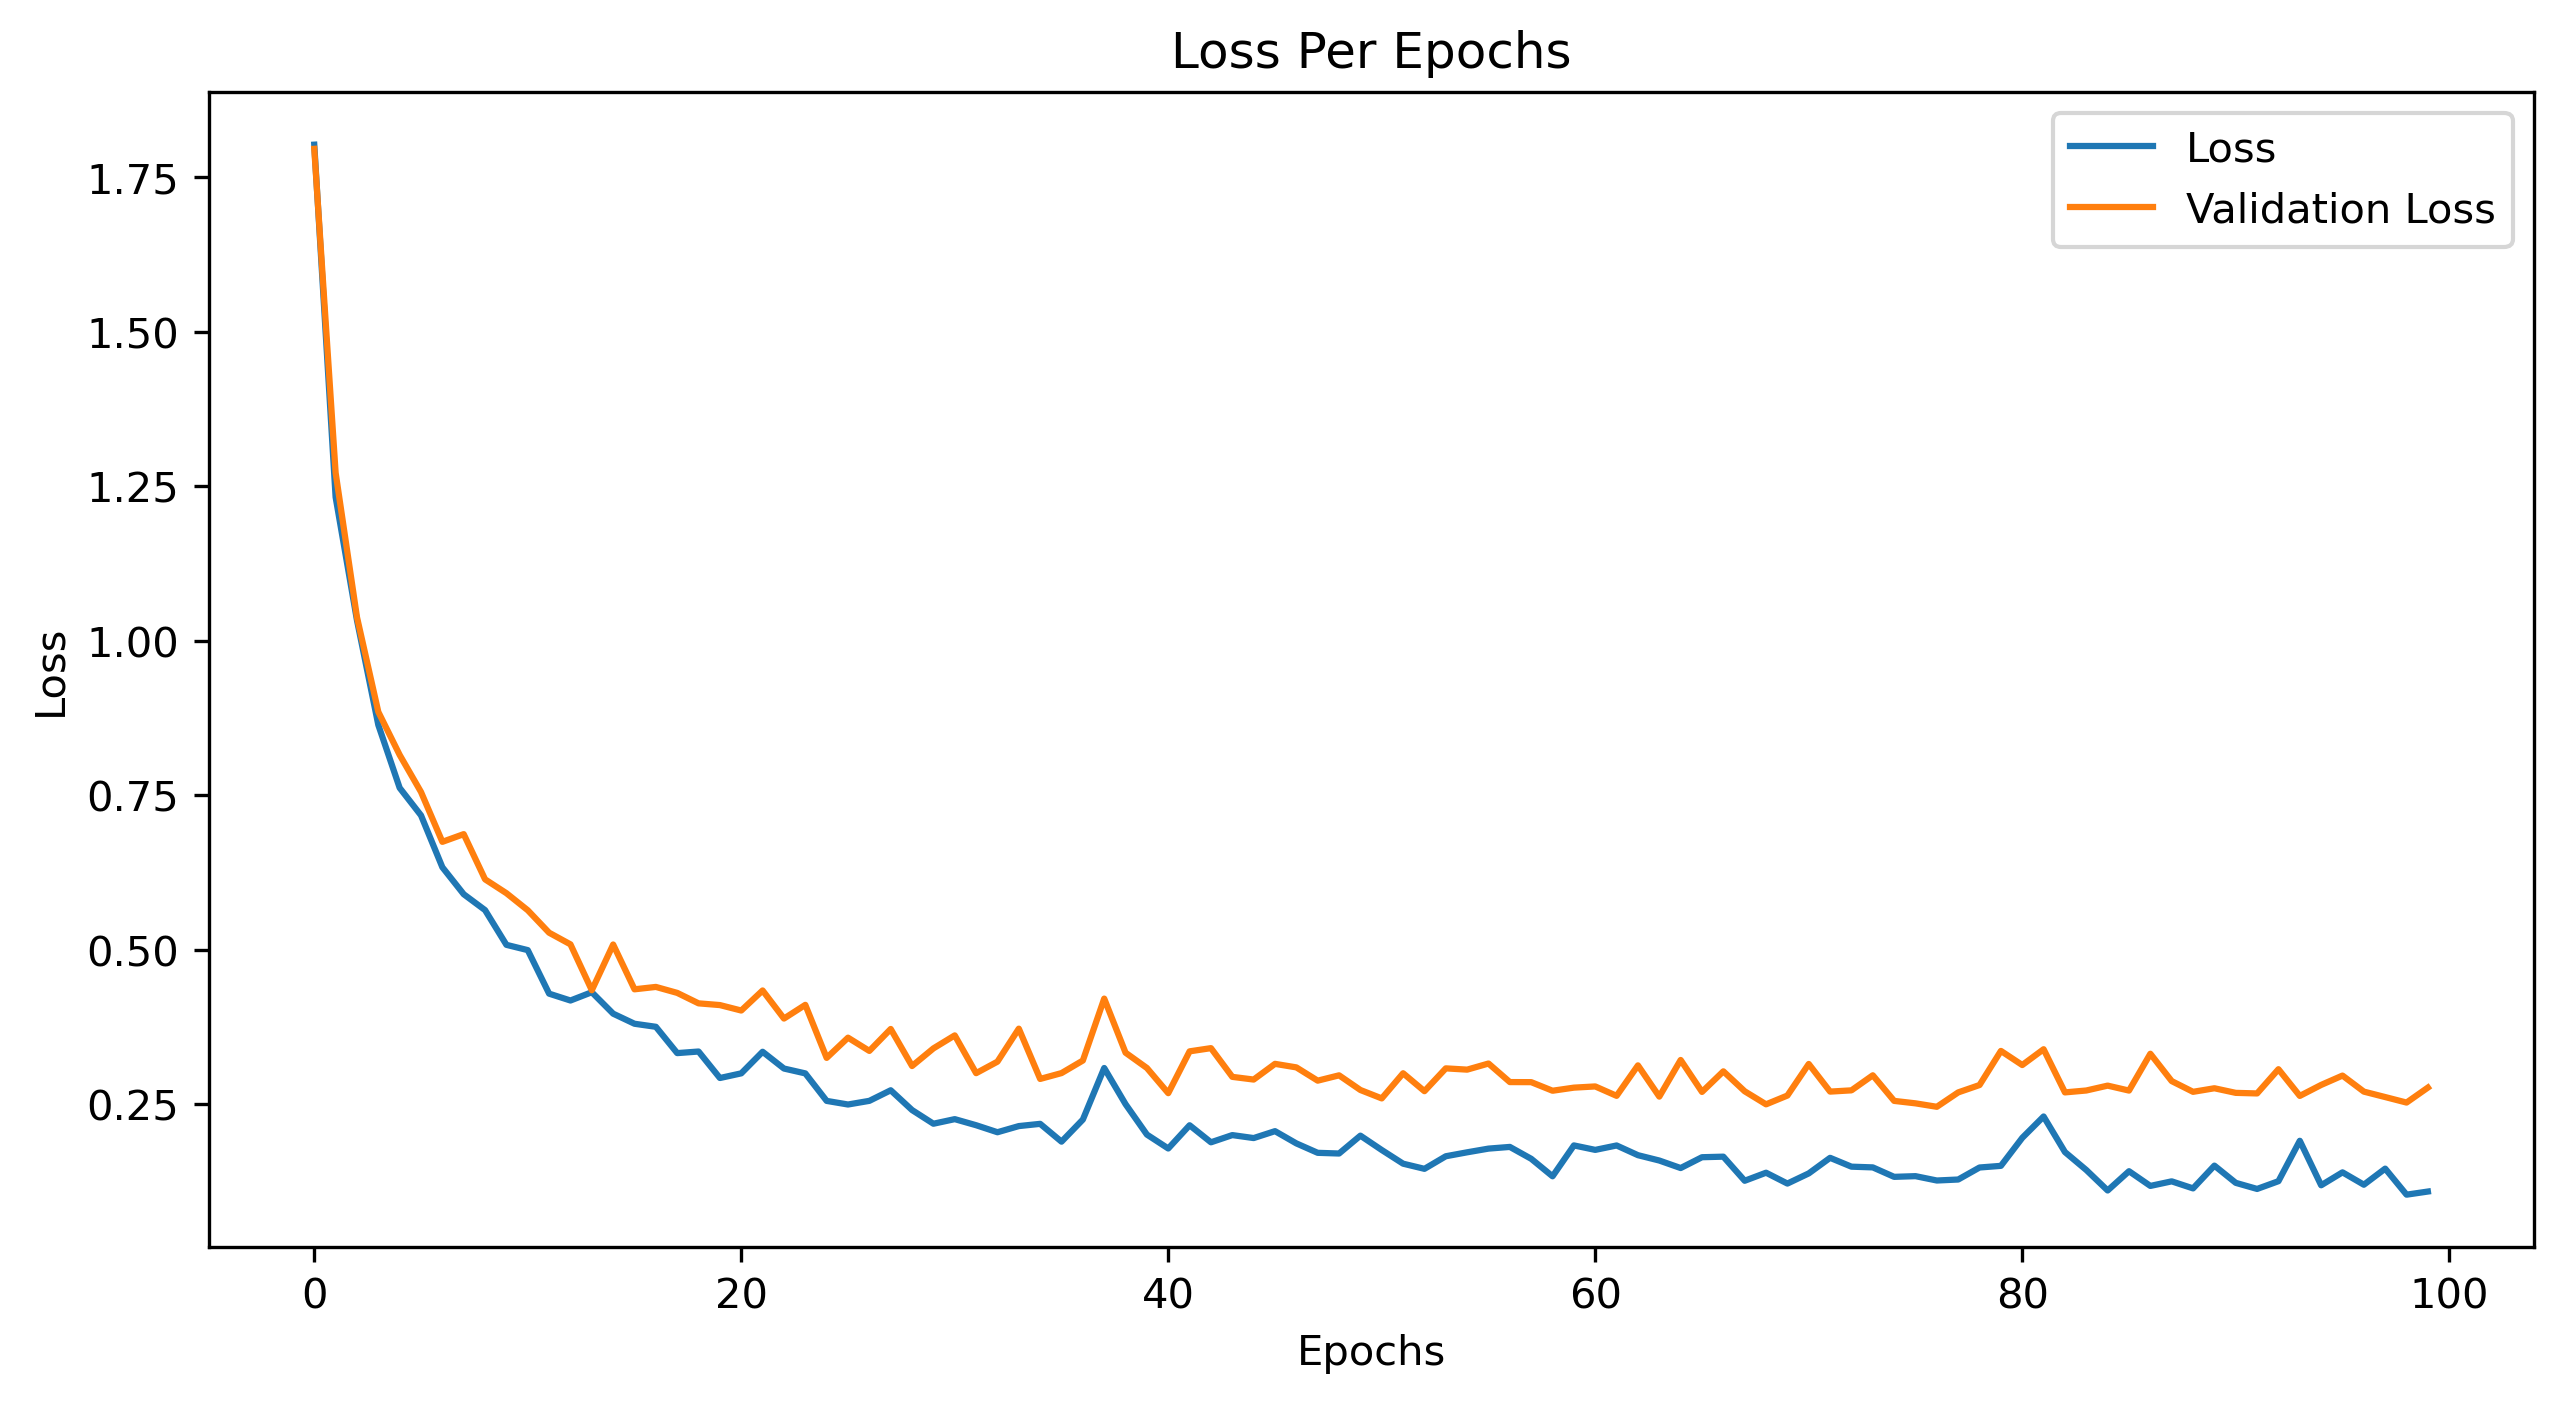

In [93]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m2[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


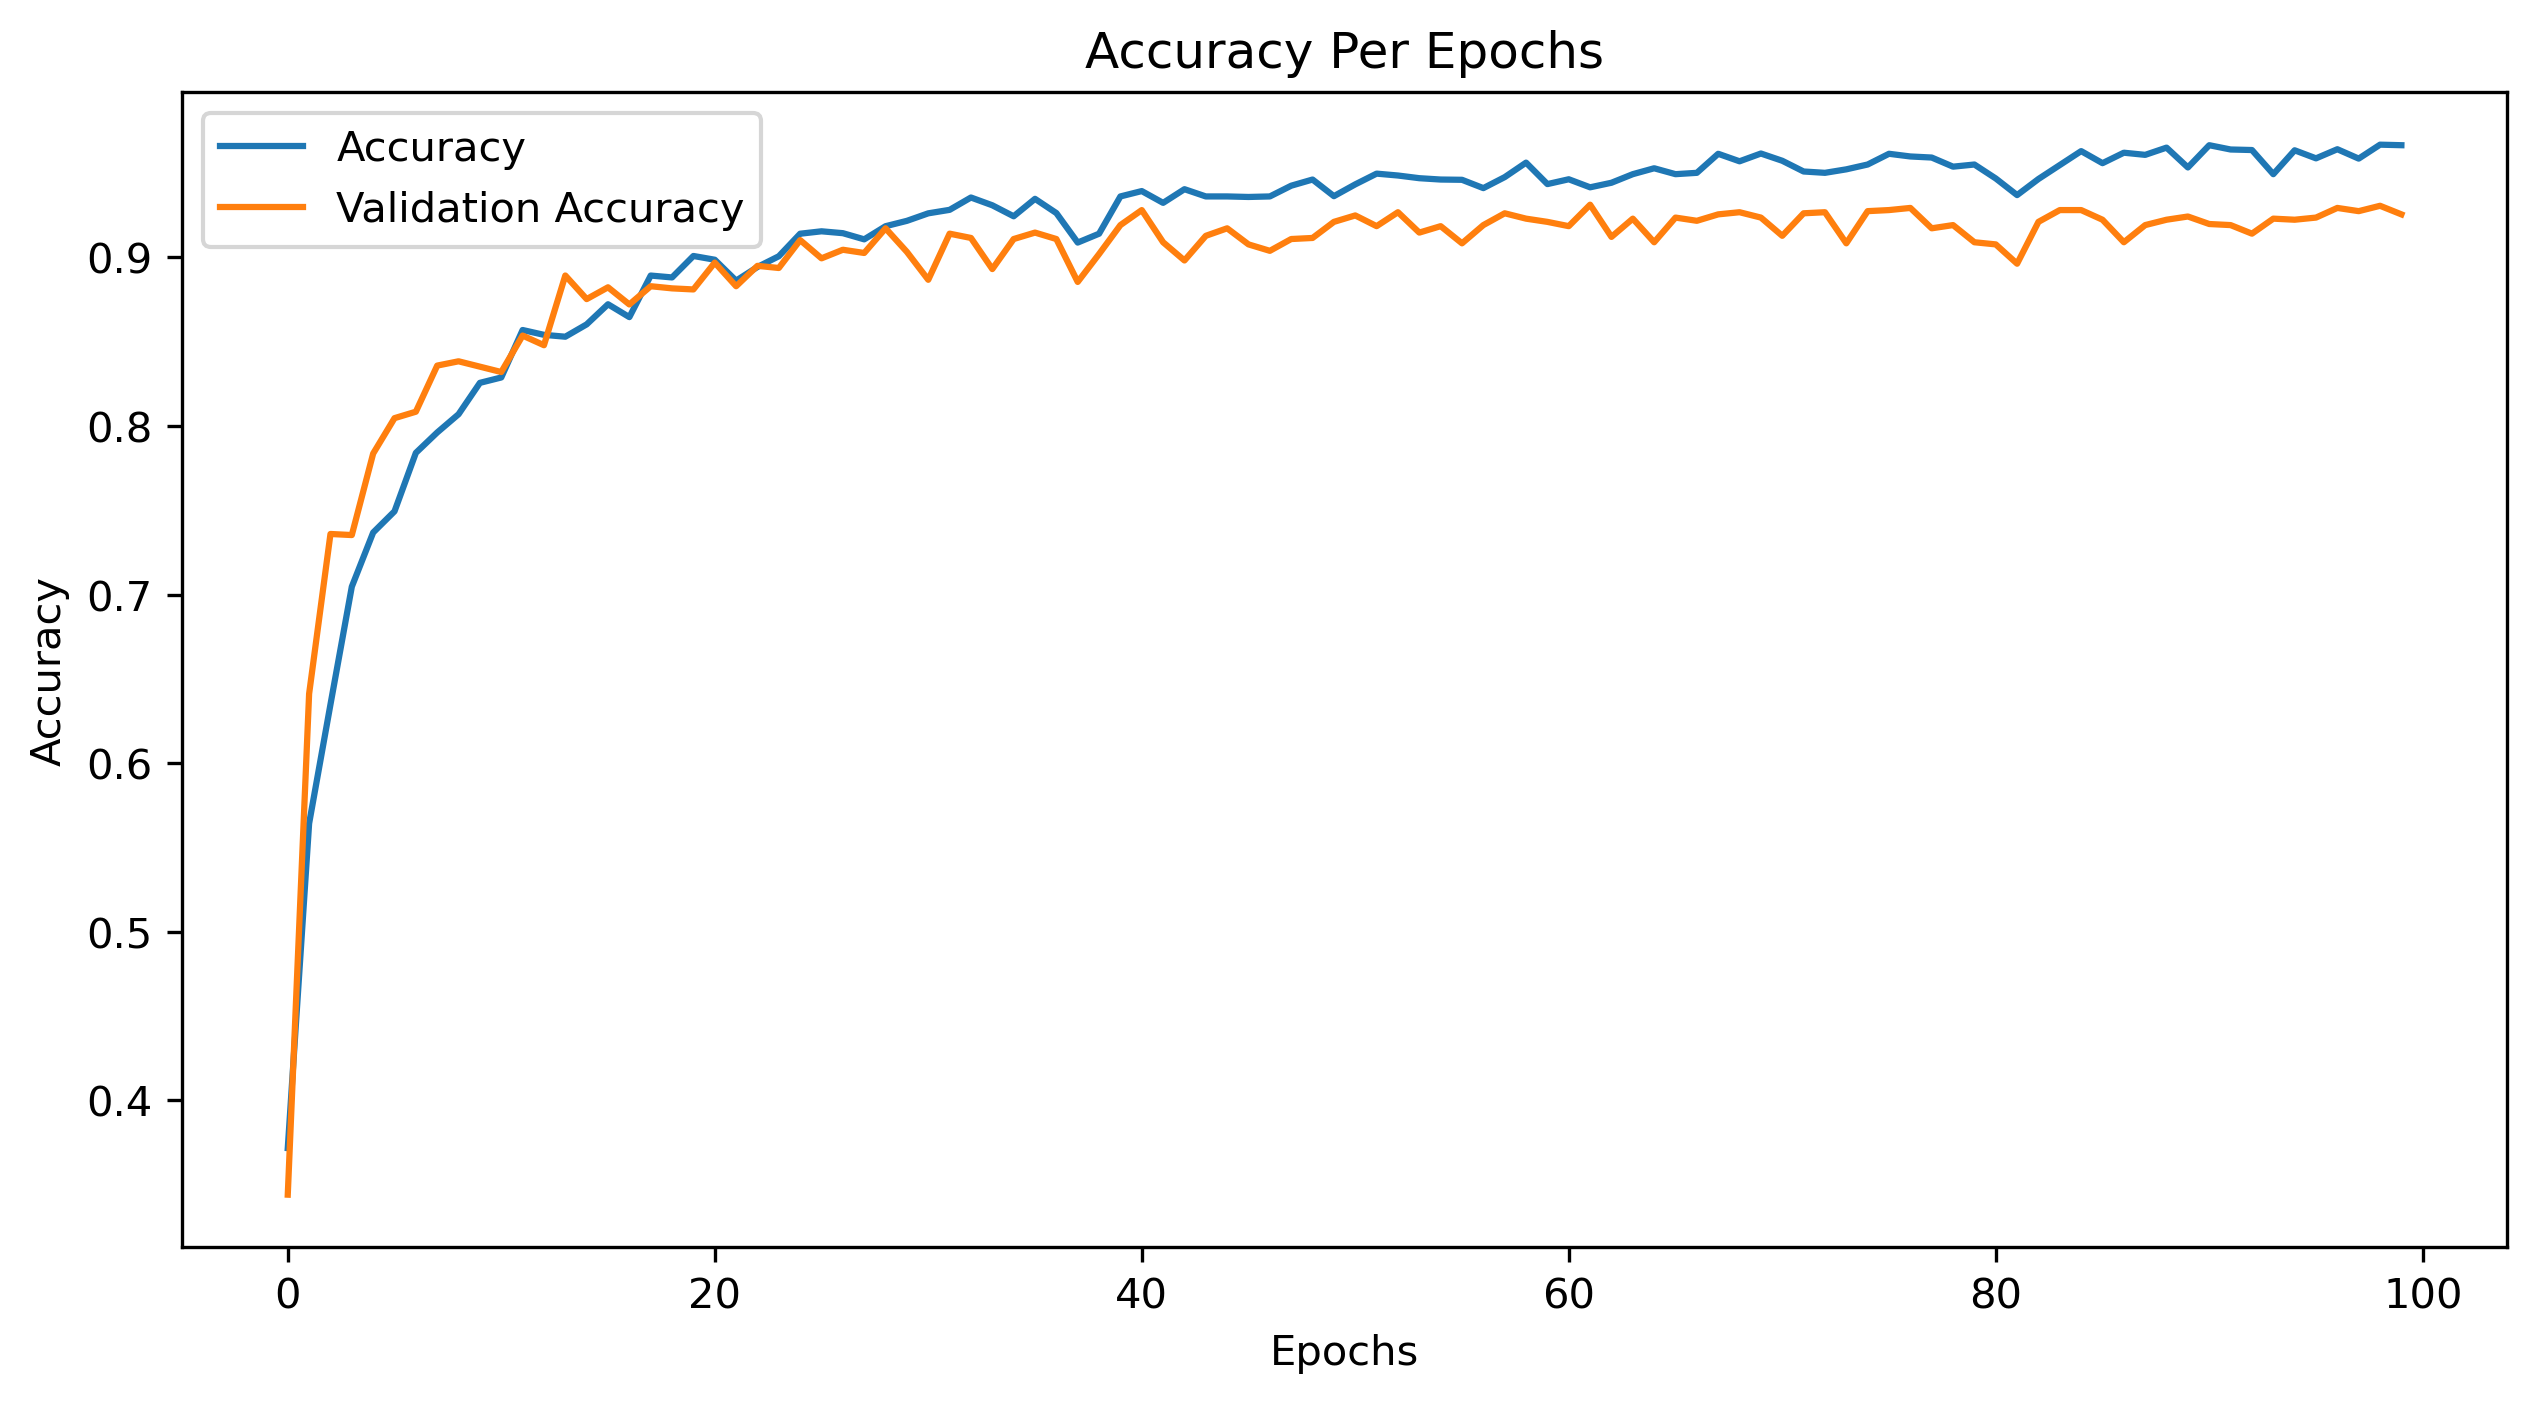

In [94]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m2[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


In [95]:
acc_m2 = CNN1D_Model.evaluate(xvalid, yvalid, verbose=0)
t0 = time.time()
y_pred_m2 = CNN1D_Model.predict(xvalid, verbose=0)
pred_m2 = round(time.time() - t0, 3)
log_entry = pd.DataFrame(
    [["CNN1D", acc_m2[1] * 100, train_m2, pred_m2]], columns=log_cols
)
log = pd.concat([log, log_entry], ignore_index=True)


## CNN1D Prediction Function


In [96]:
# function to predict the feature
def CNN1D_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # expand dims
    final_prediction_feature = np.expand_dims(prediction_feature, axis=2)
    # get the id of label using argmax
    predicted_vector = np.argmax(CNN1D_Model.predict(final_prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("CNN1D has predicted the class as  --> ", predicted_class[0])


## Testing the Model on Sample audio


In [97]:
# File name
file_name = audio_dataset_path + "fold10/14468-3-5-0.wav"
# get the output
CNN1D_Prediction(file_name)
# play the file
ipd.Audio(file_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
CNN1D has predicted the class as  -->  Dog Bark


# **Model 3 - CNN2D**


## Preprocessing


In [98]:
xtrain = xTrain.reshape(xTrain.shape[0], 16, 8, 1)
xtest = xTest.reshape(xTest.shape[0], 16, 8, 1)

print("The Shape of X Train", xtrain.shape)
print("The Shape of Y Train", yTrain.shape)
print("The Shape of X Test", xtest.shape)
print("The Shape of Y Test", yTest.shape)


The Shape of X Train (6286, 16, 8, 1)
The Shape of Y Train (6286, 10)
The Shape of X Test (874, 16, 8, 1)
The Shape of Y Test (874, 10)


## Building the CNN2D Model


In [99]:
CNN2D_Model = Sequential()
CNN2D_Model.add(
    Conv2D(64, (3, 3), padding="same", activation="tanh", input_shape=(16, 8, 1))
)
CNN2D_Model.add(MaxPool2D(pool_size=(2, 2)))
CNN2D_Model.add(Conv2D(128, (3, 3), padding="same", activation="tanh"))
CNN2D_Model.add(MaxPool2D(pool_size=(2, 2)))
CNN2D_Model.add(Dropout(0.1))
CNN2D_Model.add(Flatten())
CNN2D_Model.add(Dense(1024, activation="tanh"))
CNN2D_Model.add(Dense(10, activation="softmax"))
CNN2D_Model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 16, 8, 64)           │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 4, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,134,346 (4.33 MB)

 Trainable params: 1,134,346 (4.33 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model


In [100]:
CNN2D_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)


## Fitting the Model


In [101]:
t0 = time.time()

CNN2D_Results = CNN2D_Model.fit(
    xtrain, yTrain, epochs=100, batch_size=50, validation_data=(xtest, yTest)
)

CNN2D_Model.save("Model3.h5")
print("CNN2D Model Saved")
train_hist_m3 = pd.DataFrame(CNN2D_Results.history)
train_m3 = round(time.time() - t0, 3)


Epoch 1/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4890 - loss: 1.5583 - val_accuracy: 0.7700 - val_loss: 0.6881
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7883 - loss: 0.6307 - val_accuracy: 0.7586 - val_loss: 0.6712
Epoch 3/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8637 - loss: 0.4289 - val_accuracy: 0.8547 - val_loss: 0.4173
Epoch 4/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9102 - loss: 0.2850 - val_accuracy: 0.8570 - val_loss: 0.4623
Epoch 5/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9162 - loss: 0.2497 - val_accuracy: 0.8570 - val_loss: 0.4424
Epoch 6/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9335 - loss: 0.1937 - val_accuracy: 0.8513 - val_loss: 0.5918
Epoch 7/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9428 - loss: 0.1630 - val_accuracy: 0.9016 - val_loss: 0.3814
Epoch 8/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9460 - loss: 0.1463 - 

CNN2D Model Saved


## Results


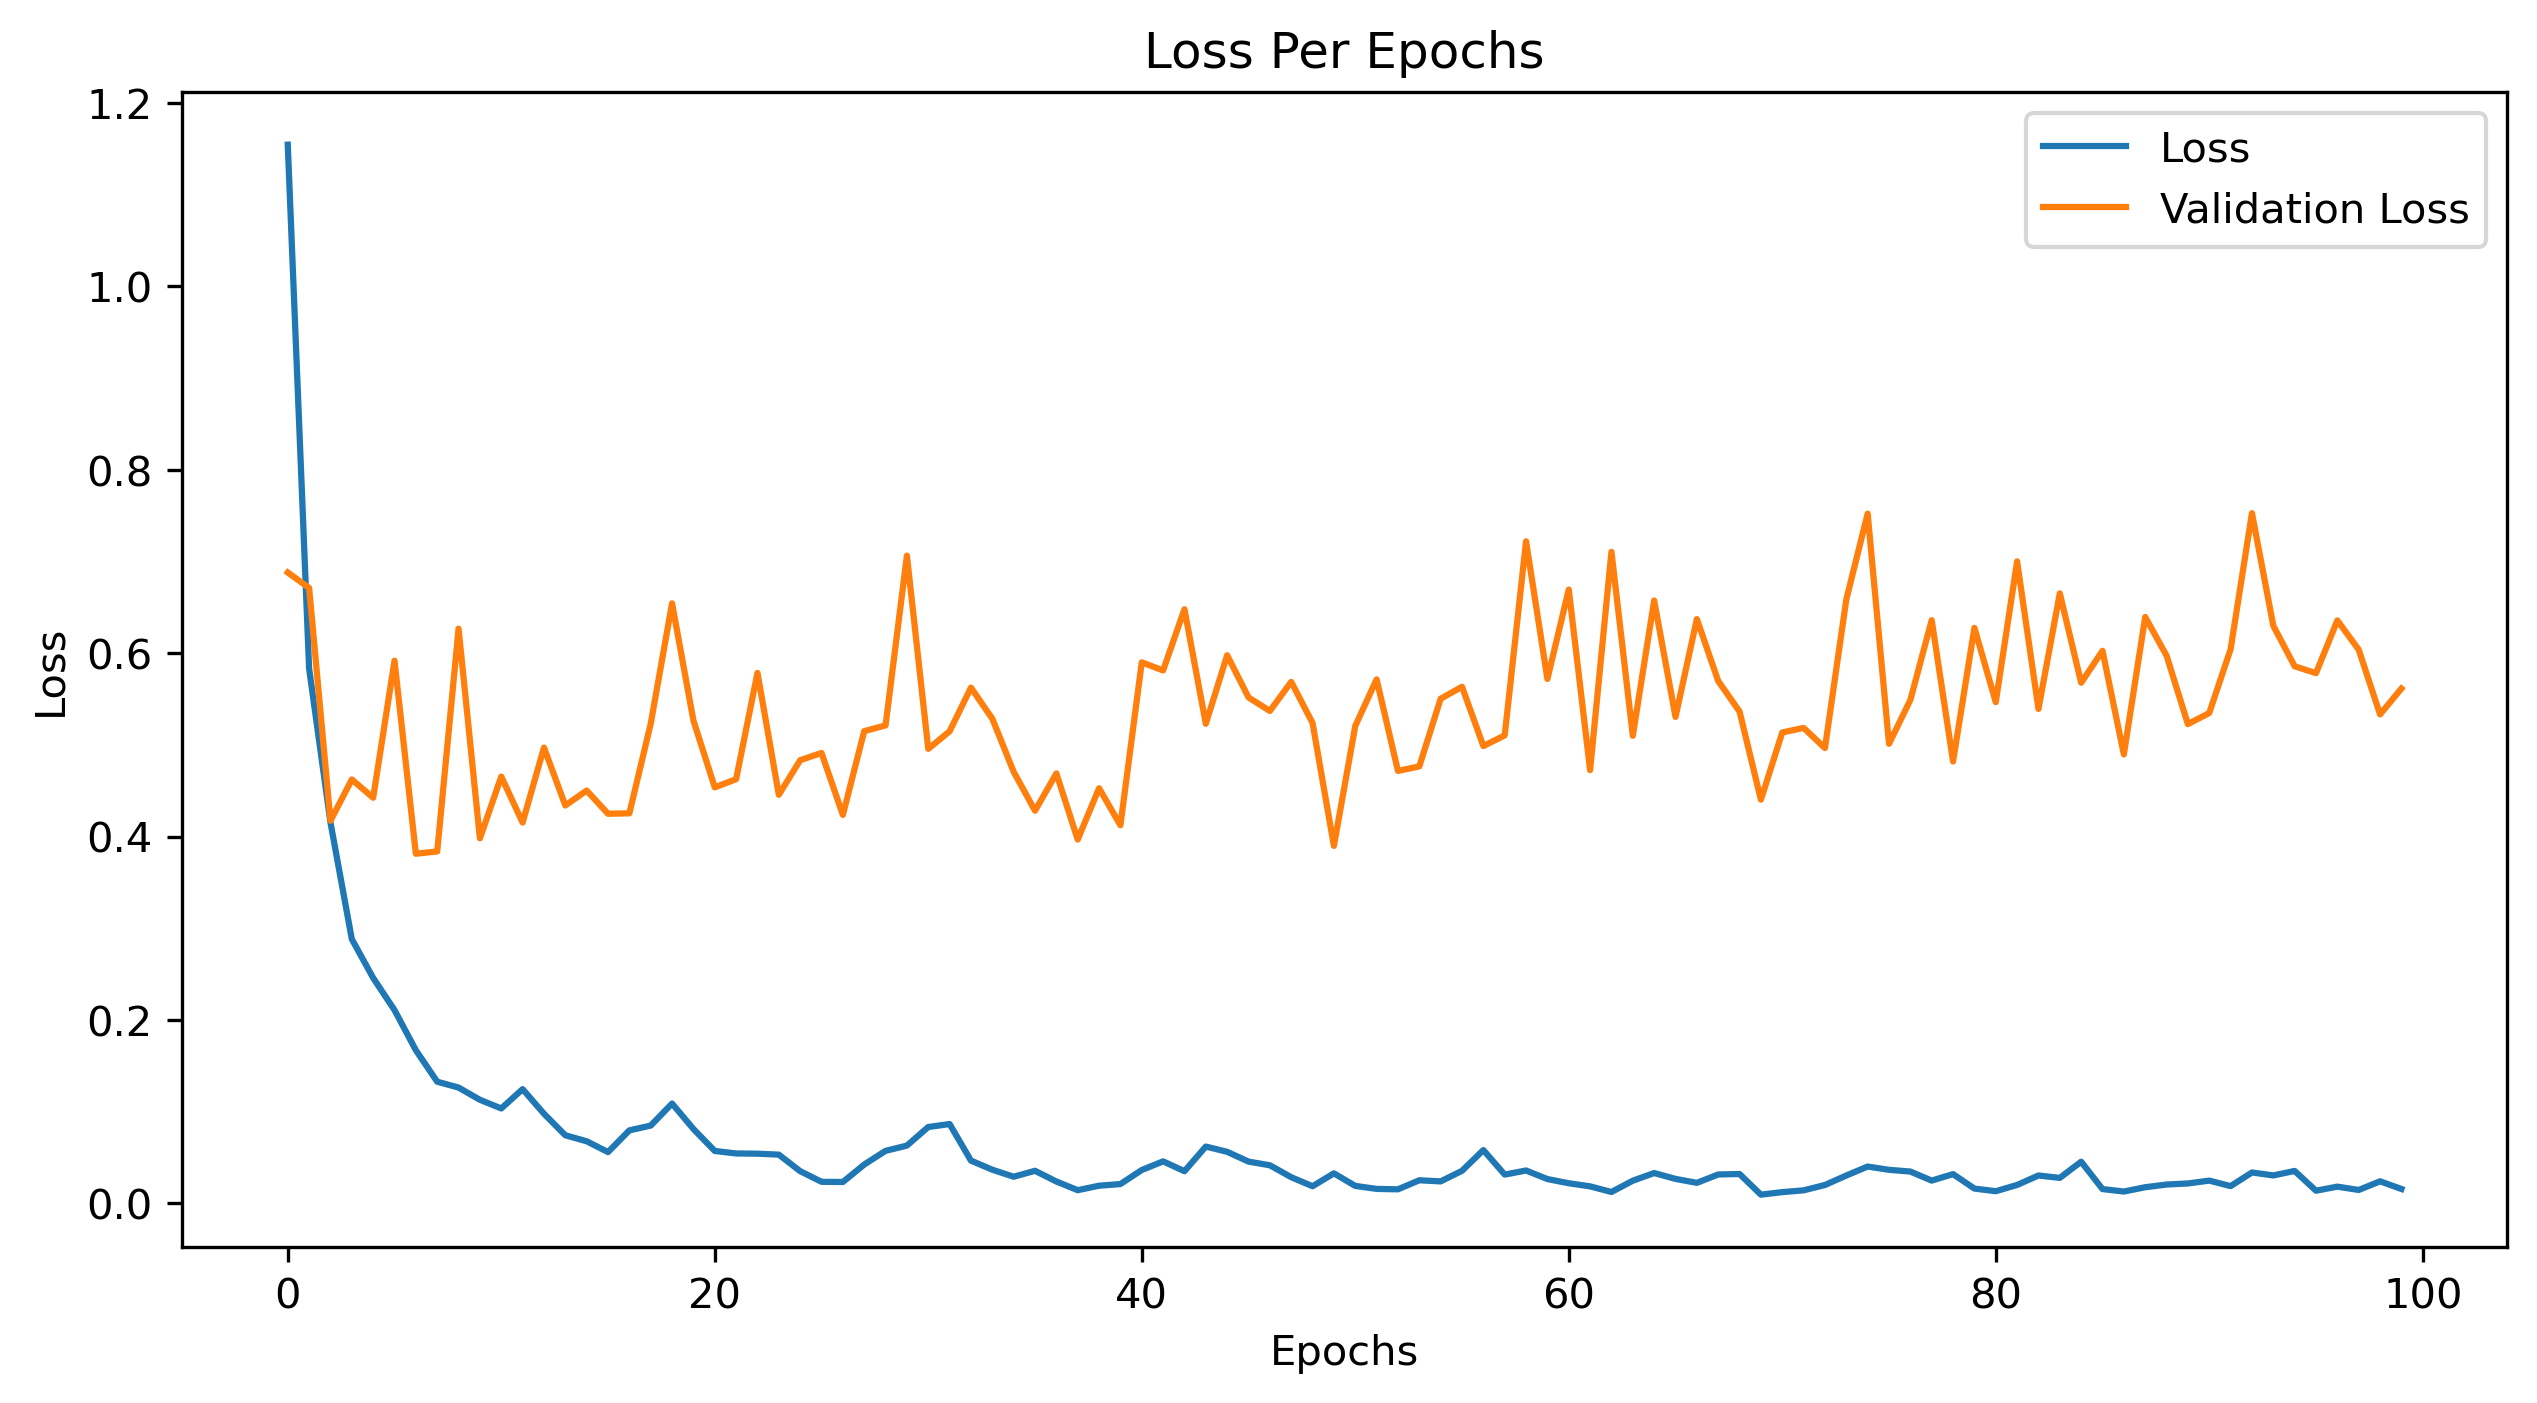

In [102]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m3[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


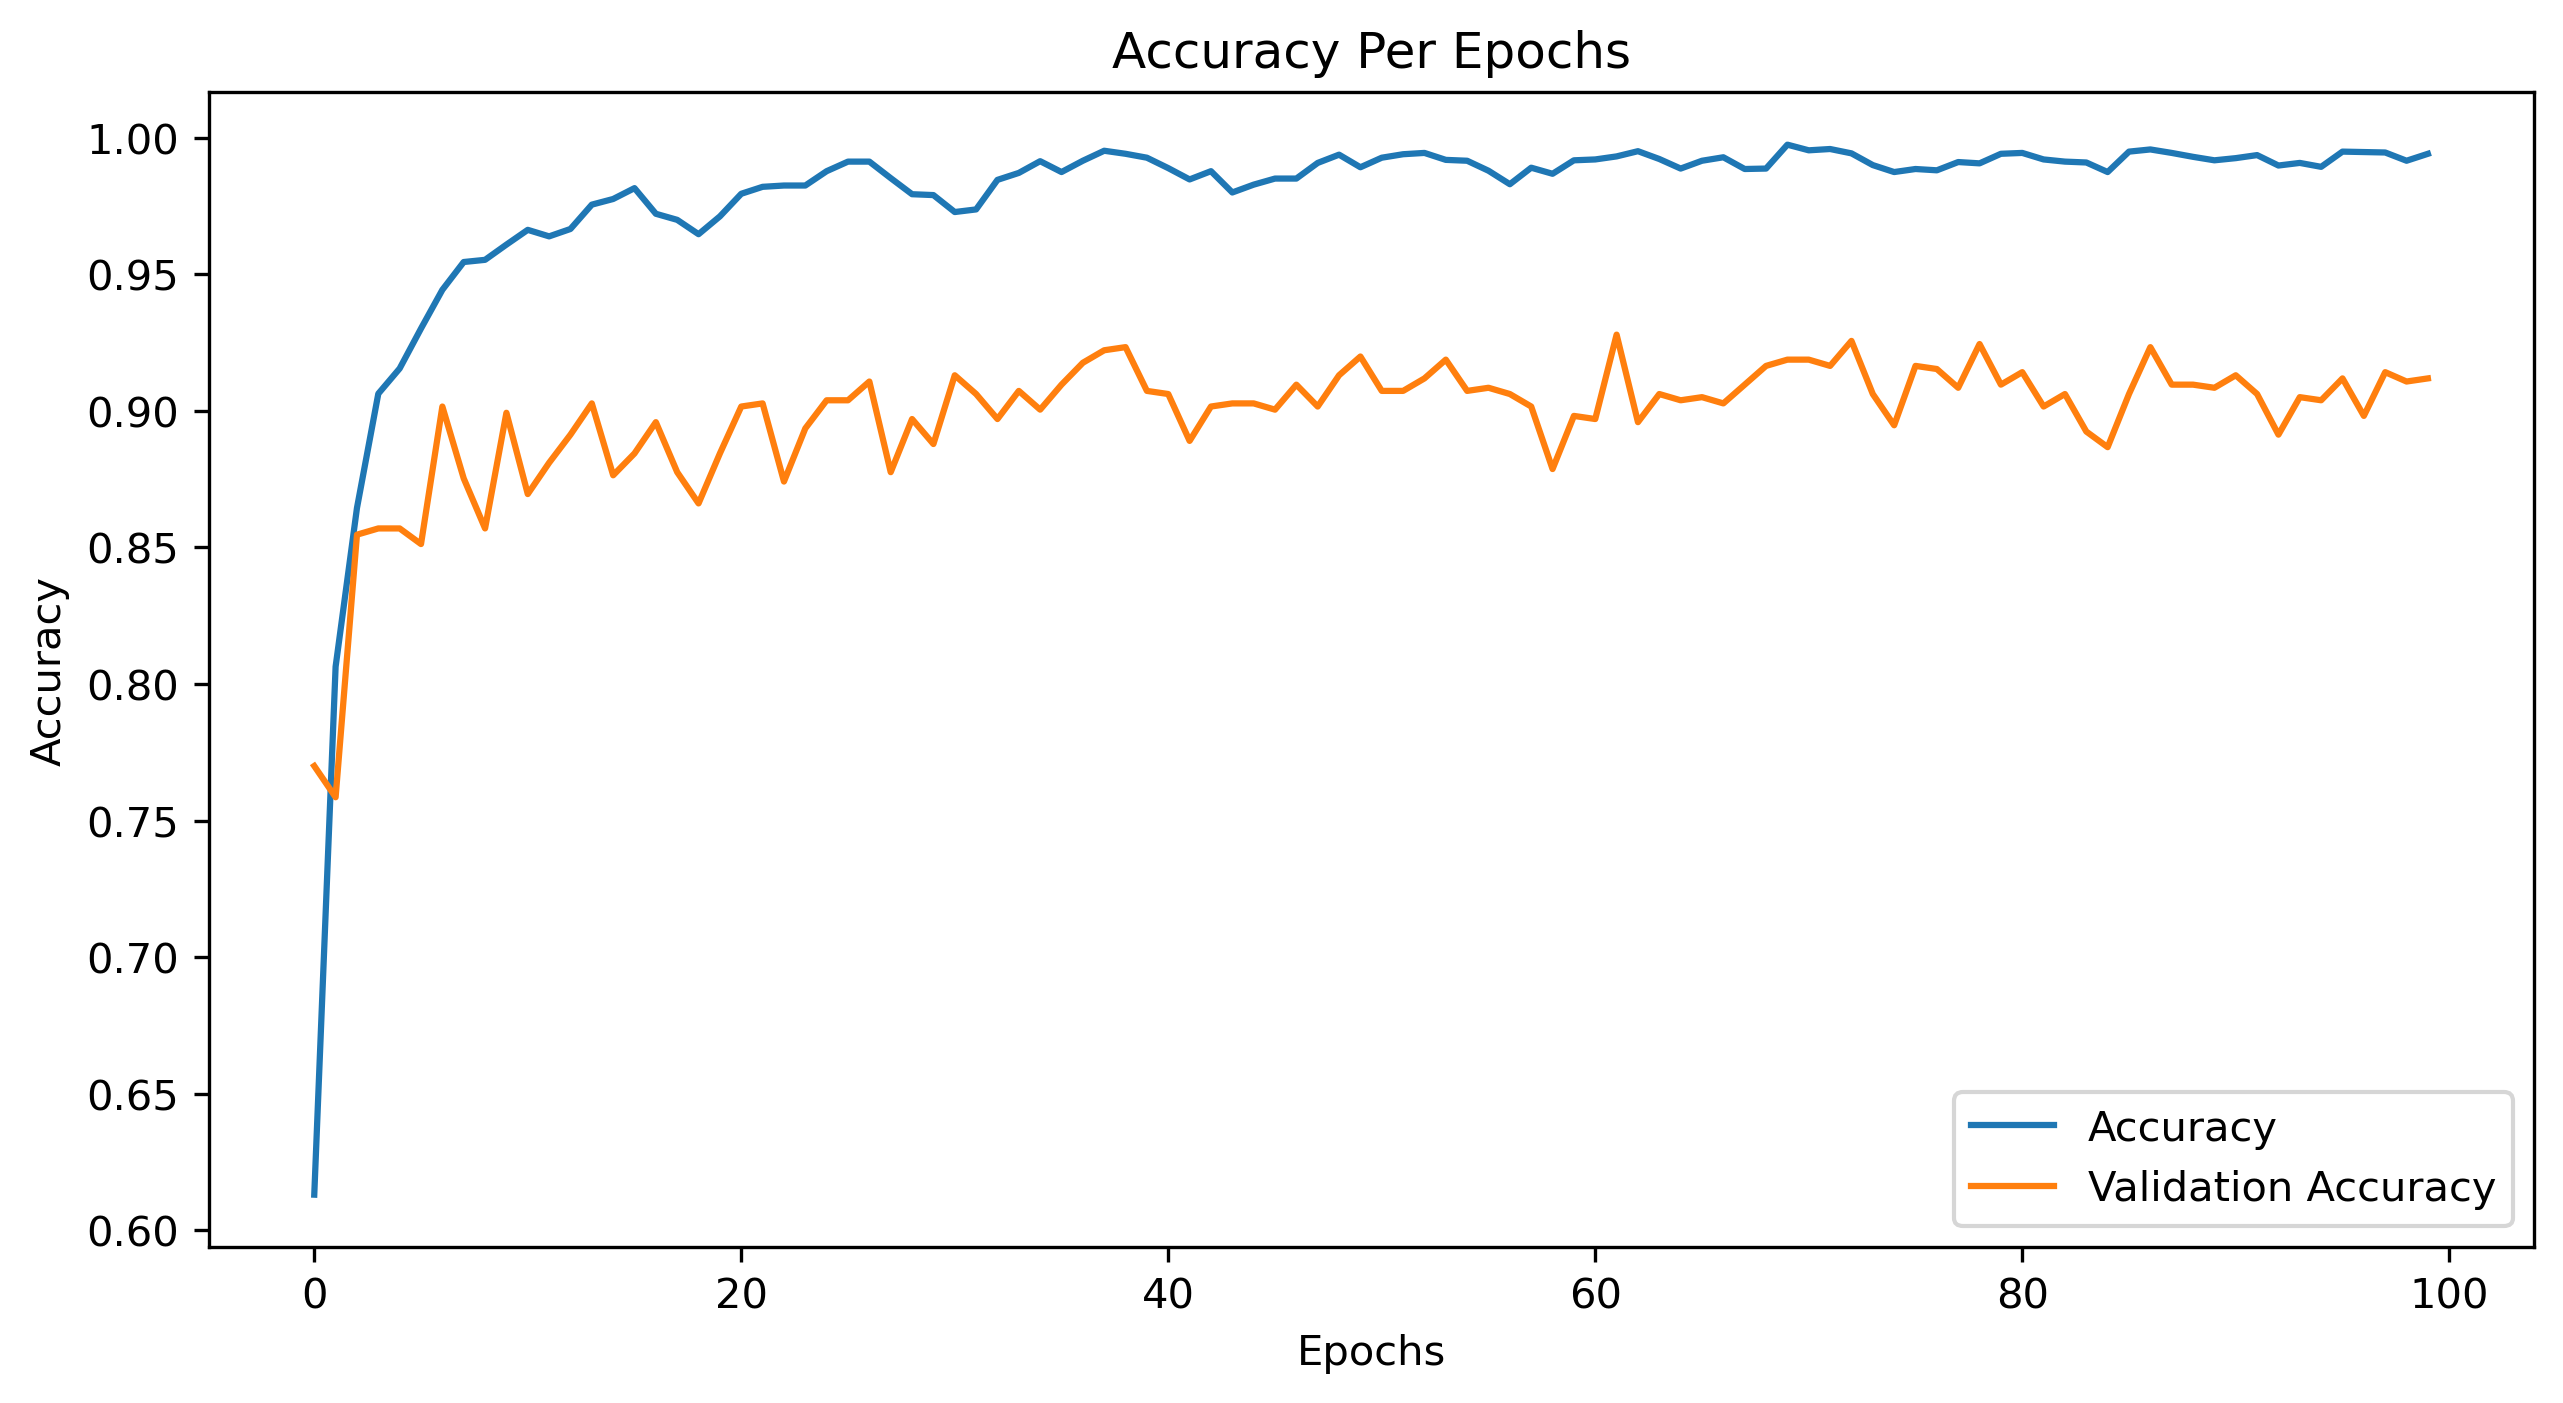

In [103]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m3[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


In [104]:
acc_m3 = CNN2D_Model.evaluate(xtest, yTest, verbose=0)
t0 = time.time()
y_pred_m3 = CNN2D_Model.predict(xtest, verbose=0)
pred_m3 = round(time.time() - t0, 3)
log_entry = pd.DataFrame(
    [["CNN2D", acc_m3[1] * 100, train_m3, pred_m3]], columns=log_cols
)
log = pd.concat([log, log_entry], ignore_index=True)


## CNN2D Prediction Function


In [105]:
# function to predict the feature
def CNN2D_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # reshaping the features
    final_prediction_feature = prediction_feature.reshape(
        prediction_feature.shape[0], 16, 8, 1
    )
    # get the id of label using argmax
    predicted_vector = np.argmax(CNN2D_Model.predict(final_prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("CNN2D has predicted the class as  --> ", predicted_class[0])


## Testing the Model on Sample audio


In [106]:
# File name
file_name = audio_dataset_path + "fold8/103076-3-0-0.wav"
# get the output
CNN2D_Prediction(file_name)
# play the file
ipd.Audio(file_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
CNN2D has predicted the class as  -->  Dog Bark


# **Comparative Analysis**


In [107]:
plt.rcParams["figure.figsize"] = (17, 2)
plt.rcParams["figure.dpi"] = 550


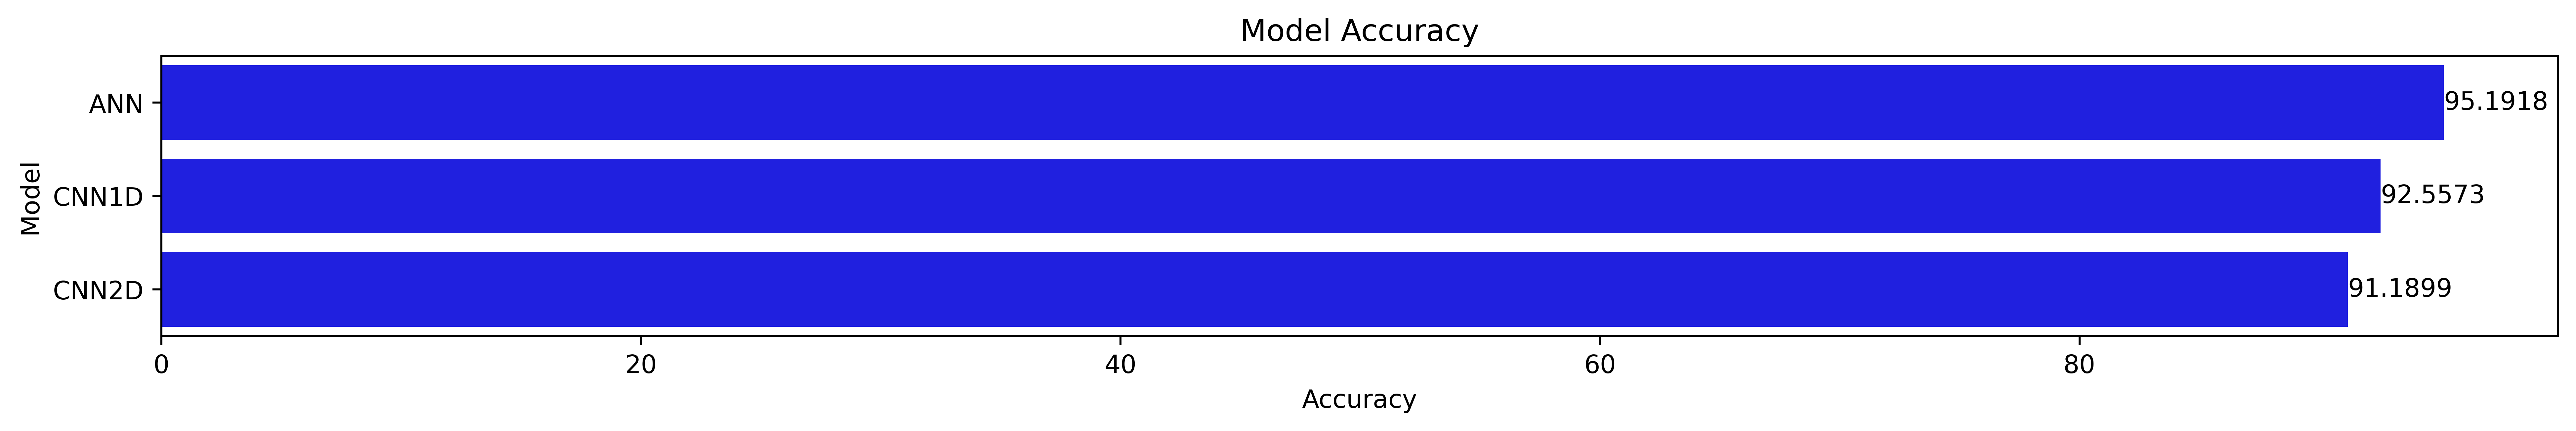

In [108]:
ax = sns.barplot(x="accuracy", y="model", data=log, color="b")
ax.bar_label(ax.containers[0])
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy")
plt.show()


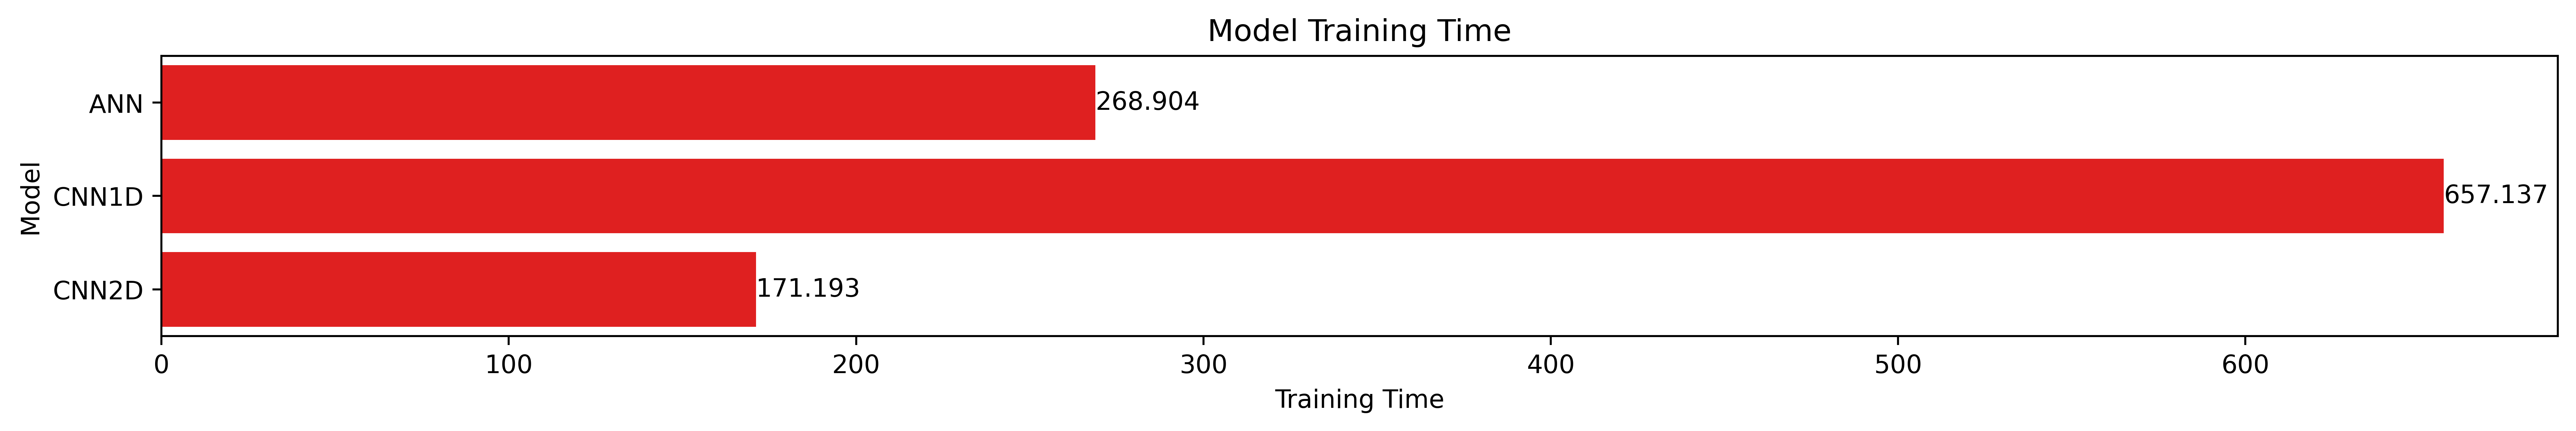

In [109]:
ax = sns.barplot(x="train_time", y="model", data=log, color="r")
ax.bar_label(ax.containers[0])
plt.xlabel("Training Time")
plt.ylabel("Model")
plt.title("Model Training Time")
plt.show()


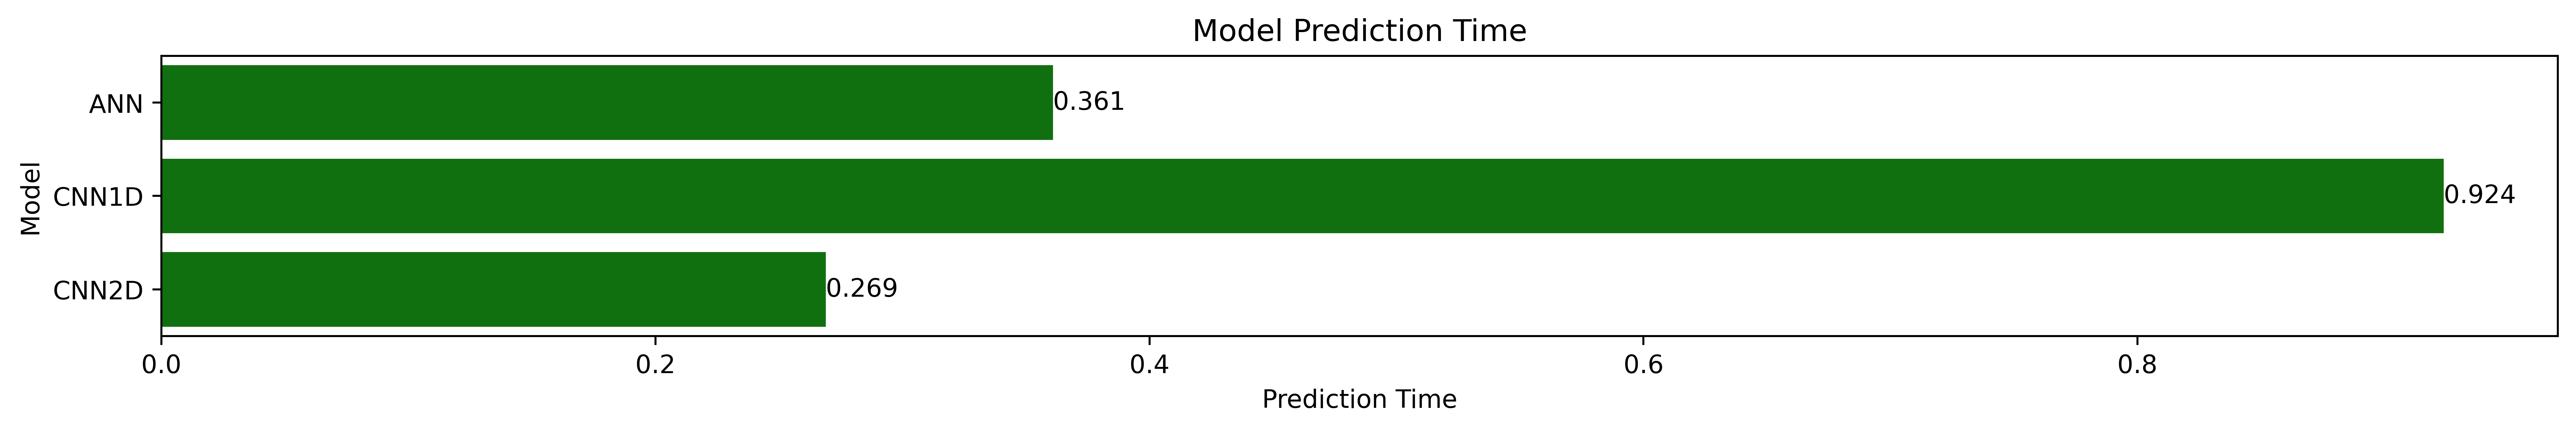

In [110]:
ax = sns.barplot(x="pred_time", y="model", data=log, color="g")
ax.bar_label(ax.containers[0])
plt.xlabel("Prediction Time")
plt.ylabel("Model")
plt.title("Model Prediction Time")
plt.show()
